# Data Analysis done as part of google data analysis certificate final project.  Hypothetical business organization and business questions. 
# ASK: BUSINESS TASK

**Gold Coast Conservation Group** is a 501(c)(4)concerned with the effects of climate change on 
campground, parks and lakes in locations with Mediterranean climate. **Gold Coast Conservation Group** endorses, lobbies and provides policy strategies to politicians. **Gold Coast Conservation Group** wants to study *the causes of fires in public lands, the time of year when forest fires occur in high frequency and recommendations to prevent/minimize forest fires.*

## BUSINESS QUESTIONS

  *What role does weather/climate play in causing fires in public lands?
  
  *What time of year do most fires take place and what is the significance of the time frame?
  
  *What are the soil conditions that cause fires in public lands?
  
  *Provide recommendations to prevent fires in public lands and lakes.
  
  *Can we extrapolate the study and apply the lessons to regions with similar climate conditions to the study?
  
  *Can the findings be used as indicators of long term climate change effects in Santa Barbara county?  

## Stakeholders and Audience
**Gold Coast Conservation Group** stakeholders are two conservationists, a former fire department chief and two animal rights activists.  The five member panel is concerned with protecting public land and wildlife.  The stakeholders will present the findings at fund raising and recruiting events.  

### Data and Metrics
UC Irvine has a machine learning repository which includes a data set of forest fire data in Montesinho Natural Park in Portugal.  The data set is part of research conducted by Paulo Cortez and Anibal Morais.  The data set satisfies **Gold Coast Conservation Group's** interest in studying campground, parks and lakes in locations with Mediterranean climate.  

The key metrics in the data are weather conditions from 2000-2003 in Montesinho Natural Park, location of forest fires, dates of forest fires and the fire weather index data dealing with fuel index, initial forest fire spread, duff moisture conditions and drought conditions.  

# PREPARE: DESCRIPTION OF ALL DATA SOURCES
The data was acquired from [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/forest+fires). The sources for the data are Paulo Cortez and Anibal Morais from the Department of Information Systems, University of Minho, Portugal.  Paulo Cortez and Anibal Morais used the data to create and publish [A Data Mining Approach to Predict Forest Fires using Meteorological Data](http://www3.dsi.uminho.pt/pcortez/fires.pdf). In this study the focus is on analysis of the data.  No machine learning algorithm will be created for this analysis. 

### Data Credibility

  *Reliable: The data was acquired, curated and used to publish data science predictions by universities in Portugal and the United States
  
  *Original: The data comes from observations and calculations from the Canadian Forest Fire Weather Index(FWI) which is used today by Canada, Argentina, and New Zealand. The index is original data acquired from forest fires in Montesinho Natural park between 2000-2003.
  
  *Comprehensive: Data is comprehensive and includes every forest fire, location of forest fire, weather conditions and fuel in various layers in the Montesinho Natural Park. 
  
  *Current: The date of the data acquisition is 2000-2003 but it uses variables that are currently used to predict forest fires in various countries throughout the world.  
  
  *Cited: [A Data Mining Approach to Predict Forest Fires using Meteorological Data](http://www3.dsi.uminho.pt/pcortez/fires.pdf) and [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/forest+fires)

The analysis will be done with R.  The data is placed in a cloud server and requires a pass code and multiple verification to access the computer and cloud network.  The data is public and the results will be published for public consumption but the stakeholder names will not be divulged.  Data sourcing will be included in the final report visualizations.  

The integrity of the data is verified through the initial study and the location of the data.  The data comes from a reputable research university in the United States.  Acclimation and to understand the values in the data set required [research](https://www.ncwg.gov/publications/pms437/cffdrs/fire-weather-index-system) on the Fire Weather Index that is used by Canada and other countries and the data follows FWI fuel moisture [codes](https://cwfis.cfs.nrcan.gc.ca/background/summary/fwi). 

## Sort and Filter Data

In [1]:
library(tidyr)
library(dplyr)
library(data.table)
library(formattable)
library(DT)
library(psych)
library(ggplot2)
library(tidyverse)
library(corrplot)
library(h2o)
library(lares)
install.packages("weathermetrics")
library(weathermetrics)
library(wesanderson)
library(ggalluvial)
install.packages("measurements")
library(measurements)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘formattable’


The following object is masked from ‘package:bigrquery’:

    format_table



Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   0.3.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()        masks psych::%+%()
✖ ggplot2::alpha()      masks psych::alpha()
✖ data.table::between() masks dplyr::between()
✖ dplyr::filter()       masks stats::filter()
✖ data.table::first()   mas

In [2]:
forest_fire_2 <- read.csv("../input/forest-fires-data-set-portugal/forestfires.csv")
str(forest_fire_2)

'data.frame':	517 obs. of  13 variables:
 $ X    : int  7 7 7 8 8 8 8 8 8 7 ...
 $ Y    : int  5 4 4 6 6 6 6 6 6 5 ...
 $ month: chr  "mar" "oct" "oct" "mar" ...
 $ day  : chr  "fri" "tue" "sat" "fri" ...
 $ FFMC : num  86.2 90.6 90.6 91.7 89.3 92.3 92.3 91.5 91 92.5 ...
 $ DMC  : num  26.2 35.4 43.7 33.3 51.3 ...
 $ DC   : num  94.3 669.1 686.9 77.5 102.2 ...
 $ ISI  : num  5.1 6.7 6.7 9 9.6 14.7 8.5 10.7 7 7.1 ...
 $ temp : num  8.2 18 14.6 8.3 11.4 22.2 24.1 8 13.1 22.8 ...
 $ RH   : int  51 33 33 97 99 29 27 86 63 40 ...
 $ wind : num  6.7 0.9 1.3 4 1.8 5.4 3.1 2.2 5.4 4 ...
 $ rain : num  0 0 0 0.2 0 0 0 0 0 0 ...
 $ area : num  0 0 0 0 0 0 0 0 0 0 ...


The data has 517 observations/rows and 13 variables/columns.  

### Column Names

In [3]:
#Column Names
colnames(forest_fire_2)

[1] "X"     "Y"     "month" "day"   "FFMC"  "DMC"   "DC"    "ISI"   "temp" 
[10] "RH"    "wind"  "rain"  "area"

### Summary of Data

In [4]:
summary(forest_fire_2)

       X               Y          month               day           
 Min.   :1.000   Min.   :2.0   Length:517         Length:517        
 1st Qu.:3.000   1st Qu.:4.0   Class :character   Class :character  
 Median :4.000   Median :4.0   Mode  :character   Mode  :character  
 Mean   :4.669   Mean   :4.3                                        
 3rd Qu.:7.000   3rd Qu.:5.0                                        
 Max.   :9.000   Max.   :9.0                                        
      FFMC            DMC              DC             ISI        
 Min.   :18.70   Min.   :  1.1   Min.   :  7.9   Min.   : 0.000  
 1st Qu.:90.20   1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500  
 Median :91.60   Median :108.3   Median :664.2   Median : 8.400  
 Mean   :90.64   Mean   :110.9   Mean   :547.9   Mean   : 9.022  
 3rd Qu.:92.90   3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800  
 Max.   :96.20   Max.   :291.3   Max.   :860.6   Max.   :56.100  
      temp             RH              wind            

*The data provides weather and Fire Weather Index values. 
  
  *X and Y columns are grids corresponding to the map of Montesinho Natural Park.  
  
  *Area provides the amount of area burned in hectares.  

The data requires cleaning but from a high level view of the data, it has the requirements needed to provide the required study for **Gold Coast Conservation Group**. 

# PROCESS: DOCUMENTATION OF ANY CLEANING OR MANIPULATION OF DATA

The data will be cleaned and analyzed with R.  Visualizations will be stored in a folder.

## CLEANING DATA
### Check for NA's.

In [5]:
#Verify if Data has NA's

any(is.na(forest_fire_2))

[1] FALSE

### Lower Case Column Names

In [6]:
#Lower case column names
forest_fire_2 <- forest_fire_2 %>% rename_with(tolower)

colnames(forest_fire_2)



[1] "x"     "y"     "month" "day"   "ffmc"  "dmc"   "dc"    "isi"   "temp" 
[10] "rh"    "wind"  "rain"  "area"

### Rename Columns

In [7]:
#Rename columns. 
#rename rh to relative_humidity 
forest_fire_2 <- forest_fire_2 %>% rename(humidity = rh)
colnames(forest_fire_2)

[1] "x"        "y"        "month"    "day"      "ffmc"     "dmc"     
 [7] "dc"       "isi"      "temp"     "humidity" "wind"     "rain"    
[13] "area"

### Change temperature to Fahrenheit 

In [8]:
#change temp column to F from C
forest_fire_2$temp <- celsius.to.fahrenheit(forest_fire_2$temp)
summary(forest_fire_2)

       x               y          month               day           
 Min.   :1.000   Min.   :2.0   Length:517         Length:517        
 1st Qu.:3.000   1st Qu.:4.0   Class :character   Class :character  
 Median :4.000   Median :4.0   Mode  :character   Mode  :character  
 Mean   :4.669   Mean   :4.3                                        
 3rd Qu.:7.000   3rd Qu.:5.0                                        
 Max.   :9.000   Max.   :9.0                                        
      ffmc            dmc              dc             isi        
 Min.   :18.70   Min.   :  1.1   Min.   :  7.9   Min.   : 0.000  
 1st Qu.:90.20   1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500  
 Median :91.60   Median :108.3   Median :664.2   Median : 8.400  
 Mean   :90.64   Mean   :110.9   Mean   :547.9   Mean   : 9.022  
 3rd Qu.:92.90   3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800  
 Max.   :96.20   Max.   :291.3   Max.   :860.6   Max.   :56.100  
      temp          humidity           wind            

The temperature column has a high of 91.94 degrees Fahrenheit and a mean of 66.00.  


### Format and factor the month columns for GGPLOT. 

In [9]:
#Change month column to date month
format(forest_fire_2$month, format = "%B")

#factor months to organize in ggplot
forest_fire_2 <- forest_fire_2 %>% mutate(month = factor(month, levels = c("jan", "feb", "mar", "apr", "may", "jun", "jul",
                                                                      "aug", "sep", "oct", "nov", "dec")))

head(forest_fire_2, 2)

[1] "mar" "oct" "oct" "mar" "mar" "aug" "aug" "aug" "sep" "sep" "sep" "sep"
 [13] "aug" "sep" "sep" "sep" "mar" "oct" "mar" "apr" "sep" "sep" "jun" "aug"
 [25] "aug" "aug" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep"
 [37] "oct" "oct" "oct" "mar" "jul" "aug" "aug" "sep" "sep" "sep" "sep" "jul"
 [49] "mar" "mar" "sep" "aug" "aug" "aug" "aug" "sep" "sep" "oct" "feb" "feb"
 [61] "mar" "mar" "aug" "aug" "aug" "aug" "sep" "sep" "sep" "mar" "mar" "sep"
 [73] "mar" "aug" "sep" "feb" "feb" "mar" "aug" "aug" "aug" "aug" "aug" "aug"
 [85] "aug" "sep" "sep" "sep" "sep" "mar" "aug" "mar" "aug" "aug" "aug" "sep"
 [97] "feb" "mar" "aug" "aug" "aug" "aug" "aug" "sep" "jan" "mar" "mar" "aug"
[109] "sep" "sep" "mar" "mar" "sep" "sep" "mar" "mar" "mar" "mar" "mar" "aug"
[121] "aug" "aug" "sep" "sep" "sep" "oct" "mar" "sep" "oct" "oct" "feb" "mar"
[133] "mar" "sep" "mar" "aug" "sep" "sep" "jul" "sep" "sep" "aug" "aug" "jul"
[145] "aug" "aug" "mar" "sep" "aug" "sep" "jun" "jul" "jul" "sep" "sep" "aug"
[157] "sep" "aug" "aug" "sep" "mar" "aug" "mar" "sep" "sep" "mar" "aug" "aug"
[169] "mar" "aug" "sep" "aug" "aug" "sep" "aug" "aug" "apr" "aug" "sep" "aug"
[181] "sep" "oct" "feb" "oct" "aug" "sep" "mar" "sep" "mar" "mar" "mar" "aug"
[193] "aug" "sep" "aug" "aug" "apr" "sep" "sep" "sep" "sep" "mar" "feb" "oct"
[205] "mar" "sep" "aug" "sep" "sep" "sep" "oct" "aug" "sep" "mar" "mar" "mar"
[217] "sep" "sep" "sep" "mar" "aug" "sep" "mar" "jul" "sep" "sep" "oct" "aug"
[229] "sep" "aug" "sep" "sep" "sep" "sep" "sep" "aug" "sep" "sep" "sep" "apr"
[241] "apr" "apr" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug"
[253] "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug"
[265] "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "dec" "dec" "dec"
[277] "dec" "dec" "dec" "dec" "dec" "dec" "feb" "feb" "feb" "jul" "jul" "jul"
[289] "jul" "jul" "jul" "jul" "jul" "jul" "jul" "jun" "jun" "jun" "jun" "jun"
[301] "jun" "jun" "jun" "jun" "may" "sep" "sep" "sep" "sep" "sep" "sep" "sep"
[313] "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep"
[325] "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep"
[337] "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep"
[349] "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep"
[361] "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "sep" "jul"
[373] "aug" "aug" "sep" "sep" "aug" "aug" "mar" "jan" "jul" "aug" "aug" "aug"
[385] "aug" "aug" "sep" "mar" "aug" "aug" "feb" "sep" "sep" "mar" "feb" "feb"
[397] "sep" "aug" "aug" "jun" "jun" "sep" "aug" "aug" "sep" "aug" "sep" "feb"
[409] "sep" "jul" "feb" "feb" "jul" "aug" "aug" "aug" "jul" "mar" "aug" "aug"
[421] "aug" "aug" "jul" "sep" "aug" "aug" "aug" "aug" "aug" "aug" "sep" "aug"
[433] "aug" "aug" "aug" "jul" "aug" "aug" "aug" "sep" "sep" "aug" "apr" "jul"
[445] "sep" "aug" "aug" "mar" "sep" "aug" "aug" "aug" "aug" "aug" "aug" "jul"
[457] "aug" "aug" "aug" "aug" "aug" "aug" "sep" "feb" "feb" "feb" "mar" "mar"
[469] "mar" "apr" "apr" "may" "jun" "jun" "jun" "jun" "jul" "jul" "jul" "jul"
[481] "jul" "jul" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug"
[493] "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug"
[505] "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug" "aug"
[517] "nov"

,x,y,month,day,ffmc,dmc,dc,isi,temp,humidity,wind,rain,area
,<int>,<int>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,46.76,51,6.7,0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,64.40,33,0.9,0,0


### Format and factor day column for GGPLOT.

In [10]:
forest_fire_2 <- forest_fire_2 %>% mutate(day = factor(day, levels = c("sun", "mon", "tue", "wed", "thu", "fri", "sat")))

Verified that columns follow same naming conventions. Temperature was changed from Celsius to Fahrenheit.   Cleaning process was documented. Additional cleaning might be necessary as we move through the Analyze process.  

# ANALYZE: SUMMARY OF ANALYSIS

### Analyze variable means by month. 

In [11]:
#Compare mean of FFMC, DMC, DC, ISI, TEMP AND HUMIDITY, RAIN and AREA by month
forest_fire_2_means <- forest_fire_2 %>% group_by(month) %>%
  summarize(mean_ffmc = mean(ffmc), mean_dmc = mean(dmc), mean_dc = mean(dc), 
            mean_isi = mean(isi), mean_temp = mean(temp),mean_wind = mean(wind), mean_humidity = mean(humidity), mean_rain = mean(rain), mean_area = mean(area))


#Change tibble into a dataframe
forest_fire_2_means <- as.data.frame(forest_fire_2_means)

head(forest_fire_2_means, 2)

,month,mean_ffmc,mean_dmc,mean_dc,mean_isi,mean_temp,mean_wind,mean_humidity,mean_rain,mean_area
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,jan,50.400,2.400,90.35,1.45,41.450,2.000,89.0,0,0.000
2,feb,82.905,9.475,54.67,3.35,49.343,3.755,55.7,0,6.275


### Analyze variable standard deviation by month. 

In [12]:
#compare standard deviation by month
forest_fire_2_sd <- forest_fire_2 %>% group_by(month) %>%
  summarize(sd_ffmc = sd(ffmc), sd_dmc = sd(dmc), sd_dc = sd(dc),
            sd_isi = sd(isi), sd_temp = sd(temp), sd_humidity = sd(humidity), sd_rain = sd(rain), sd_wind = sd(wind), sd_area = sd(area))



#change tibble into a dataframe
forest_fire_2_sd <- as.data.frame(forest_fire_2_sd)
head(forest_fire_2_sd,2)

,month,sd_ffmc,sd_dmc,sd_dc,sd_isi,sd_temp,sd_humidity,sd_rain,sd_wind,sd_area
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,jan,44.830570,1.838478,114.62201,2.05061,0.1272792,15.55635,0,1.555635,0.00000
2,feb,4.805531,6.197102,72.73467,1.69969,7.1506327,14.23894,0,2.345090,12.34251


### AREA BURNT STANDARD DEVIATION

In [13]:
#Create df to show values of area standard deviation by month
sd_month_area <- forest_fire_2_sd[c("month", "sd_area")]
sd_month_area

month,sd_area
<fct>,<dbl>
jan,0.000000
feb,12.342510
mar,9.140107
apr,19.929092
may,27.209469
jun,16.884945
jul,50.849299
aug,60.364174
sep,87.648175


 *August and September deviate the farthest from the mean of out of all the months from 2000-2003.  

### FFMC STANDARD DEVIATION

In [14]:
#create df to show values of ffmc standard deviation by month
sd_ffmc_month <- forest_fire_2_sd[c("month", "sd_ffmc")]
sd_ffmc_month

month,sd_ffmc
<fct>,<dbl>
jan,44.8305699
feb,4.8055314
mar,3.4919134
apr,3.9307901
may,3.1819805
jun,9.4234922
jul,2.8867030
aug,3.3142915
sep,4.1392866


*FFMC in January deviates farthest from the mean from 2000-2003.   

### DC STANDARD DEVIATION

In [15]:
#create df to show values of dc standard deviation by month
sd_dc_month <- forest_fire_2_sd[c("month", "sd_dc")]
sd_dc_month

month,sd_dc
<fct>,<dbl>
jan,114.622009
feb,72.734666
mar,24.479253
apr,28.669980
may,28.354982
jun,68.293910
jul,94.925106
aug,77.962037
sep,47.815146


 *Drought Code has levels that push the standard deviation far from the mean throughout the year. 
  
  *DC and FFMC deviate farthest from the mean the most in January. 
  
### RAIN STANDARD DEVIATION  

In [16]:
#create df to show values of rain standard deviation by month.
sd_rain_month <- forest_fire_2_sd[c("month", "sd_rain")]
sd_rain_month

month,sd_rain
<fct>,<dbl>
jan,0.00000000
feb,0.00000000
mar,0.02721655
apr,0.00000000
may,0.00000000
jun,0.00000000
jul,0.03535534
aug,0.49437319
sep,0.00000000


 *The region gets no rain. The standard deviation does not deviate from the mean throughout the year. There are no instances of heavy rain. 
  
  *The natural park went through a severe drought from 2000-2003. 


### Analyze max in variables by month. 

In [17]:
#Compare Max of FFMC, DMC, DC, ISI, TEMP, HUMIDITY, RAIN AND AREA BY MONTH

forest_fire_2_max <- forest_fire_2 %>% group_by(month) %>%
  summarize(max_ffmc = max(ffmc), max_dmc = max(dmc), max_dc = max(dc), 
            max_isi = max(isi), max_temp = max(temp), max_humidity = max(humidity), max_rain = max(rain), max_wind = max(wind), max_area = max(area))

#change forest_fire_max to dataframe
forest_fire_2_max <- as.data.frame(forest_fire_2_max)

#create df to show august and september max area burnt
august_sept_outliers <- forest_fire_2_max[c("month","max_area" )] 

#create df to show rain max values by month
rain_outliers <- forest_fire_2_max[c("month", "max_rain")]
august_sept_outliers

month,max_area
<fct>,<dbl>
jan,0.00
feb,51.78
mar,36.85
apr,61.13
may,38.48
jun,70.32
jul,278.53
aug,746.28
sep,1090.84


 *August and September have two instinces of more than 700 hectares burned.  


### RAIN MAX VALUES  

In [18]:
rain_outliers

month,max_rain
<fct>,<dbl>
jan,0.0
feb,0.0
mar,0.2
apr,0.0
may,0.0
jun,0.0
jul,0.2
aug,6.4
sep,0.0


 *August gets the most rain at 0.25 mm from 2000-2003.  


### Create data frames for the months of August and September.

In [19]:
#Create a dataframe out of August and September values
forest_fire_2_aug <- forest_fire_2[forest_fire_2$month == "aug", ]


forest_fire_2_sep <- forest_fire_2[forest_fire_2$month == "sep", ]


forest_fire_2_aug <- as.data.frame(forest_fire_2_aug)
forest_fire_2_sep <- as.data.frame(forest_fire_2_sep)

### Create data frames from means data frame for dmc to plot in ggplot

In [20]:
#Create data frame from means data frame for dmc to plot in  ggplot
dmc_2_months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
                "Sep", "Oct", "Nov", "Dec")

dmc_2_values <- c(2.4000, 9.47500, 34.54259, 15.91111, 26.70000, 93.38235, 110.38750, 153.73261,
                120.92267, 41.42000, 3.00000, 26.12222)


dmc_2_means <- data.frame(dmc_2_months, dmc_2_values)

dmc_2_means <- dmc_2_means %>% mutate(dmc_2_months = factor(dmc_2_months, levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                                                                       "Aug", "Sep", "Oct", "Nov", "Dec")))



### Create data frame from dc means to plot in ggplot

In [21]:
#create dataframe for dc means to plot in ggplot
dc_2_months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
                "Sep", "Oct", "Nov", "Dec")

dc_2_values <- c(90.35000, 54.67000, 75.94259,  48.55556,  93.75000, 297.70588, 450.60312, 641.07772,
               734.61570, 681.67333, 106.70000, 351.24444)


dc_2_means <- data.frame(dc_2_months, dc_2_values)

dc_2_means <- dc_2_means %>% mutate(dc_2_months = factor(dc_2_months, levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                                                                             "Aug", "Sep", "Oct", "Nov", "Dec")))

### Create data frame from meand data frame for ffmc to plot in ggplot

In [22]:
#create data frame from means data frame for ffmc to plot in ggplot

ffmc_2_months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
               "Sep", "Oct", "Nov", "Dec")

ffmc_2_values <- c(50.40000, 82.90500, 89.44444, 85.78889, 87.35000, 89.42941, 91.32812, 92.33696, 91.24302,
                 90.45333, 79.50000, 84.96667)


ffmc_2_means <- data.frame(ffmc_2_months, ffmc_2_values)

ffmc_2_means <- ffmc_2_means %>% mutate(ffmc_2_months = factor(ffmc_2_months, levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                                                                         "Aug", "Sep", "Oct", "Nov", "Dec")))

### Create dataframe from means data frame to plot ISI in ggplot

In [23]:
#Creating a dataframe for ISI


isi_2_months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
                 "Sep", "Oct", "Nov", "Dec")

isi_2_values <- c(1.450000, 3.350000, 7.107407, 5.377778, 4.600000, 11.776471,9.393750, 11.072283,
                8.577326, 7.146667, 1.100000, 3.466667)


isi_2_means <- data.frame(isi_2_months, isi_2_values)

isi_2_means <- isi_2_means %>% mutate(isi_2_months = factor(isi_2_months, levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul",
                                                                                 "Aug", "Sep", "Oct", "Nov", "Dec")))

## Which sectors have the highest frequency of fires in y?

In [24]:
#Which sectors have the highest frequency of fires in y by month?
forest_fire_2_freq_area_y <- aggregate(area ~  y, forest_fire_2, FUN = "length")
forest_fire_2_freq_area_y

y,area
<int>,<int>
2,44
3,64
4,203
5,125
6,74
8,1
9,6


Y runs vertically in the montesinho map. Y has 8 sectors and begins with sector 2.  Sectors 4 and 5 are the regions with the highest frequency of fires. 


## Which sectors have the highest frequency of fires in x? 

In [25]:
#Which sectors have the highest frequency of fires in x
forest_fire_2_freq_area_x <- aggregate(area ~ x, forest_fire_2, FUN = "length")
forest_fire_2_freq_area_x

x,area
<int>,<int>
1,48
2,73
3,55
4,91
5,30
6,86
7,60
8,61
9,13


X has nine sectors and it runs horizontally.  Sector 4 has the highest frequency of forest fires followed by sector 6. 


In [26]:
#aggregate the number of forest fires in sectors x and y
forest_fire_2_xy_area <- aggregate(area ~x +y, forest_fire_2, FUN = "length")
#aggregate the mean dc and dmc levels by region
forest_fire_2_xy_dmc_dc <- aggregate(dmc ~dc +x +y, forest_fire_2, FUN = "mean")
#aggregating the mean isi and ffmc levels by region
forest_fire_2ffmc_isi <- aggregate(ffmc~isi +x +y, forest_fire_2, FUN = "mean")


# DELIVERABLE: SUMMARY OF ANALYSIS
## What time of year has the most forest fires? 
August and September are the months with the most forest fires.  The summer season in Portugal begins in June and ends in September. August is the official summer month in Portugal and people in Portugal vacation the most in August and continue to September.  Park visitations by tourists and vacationers may be the reason as to why there are so many forest fires in August in September. 

In [27]:
#What is the count of fires per month in the dataset? 
forest_fire_2_area_count <- aggregate(area ~ month, forest_fire_2, FUN = "length")
forest_fire_2_area_count <- as.data.frame(forest_fire_2_area_count)
forest_fire_2_area_count

month,area
<fct>,<int>
jan,2
feb,20
mar,54
apr,9
may,2
jun,17
jul,32
aug,184
sep,172


## Which days of the week have the most forest fires?
Sunday(95), Friday(85), and Saturday(84) are days of the week when forest fires occur. This supports the conclusion that park visitation is one of the main reasons for forest fires in Montesinho Natural Park since there is a jump in forest fires on the weekend.  


In [28]:
#What is the count of fires per days of the week?
forest_fire_2_area_day <- aggregate(area ~ day, forest_fire_2, FUN = "length")
forest_fire_2_area_day

day,area
<fct>,<int>
sun,95
mon,74
tue,64
wed,54
thu,61
fri,85
sat,84


## What is the breakdown for frequency of forest fires in the month of August?
In August, Sunday jumps is the day with the most number of forest fires.  Saturday comes in second.

In [29]:
# aggregate burned by day of week in aug and sep
forest_fire_2_aug_count <- aggregate(area ~ day, forest_fire_2_aug, FUN = "length")
forest_fire_2_aug_count <- as.data.frame(forest_fire_2_aug_count)
forest_fire_2_aug_count

day,area
<fct>,<int>
sun,40
mon,15
tue,28
wed,25
thu,26
fri,21
sat,29


# What is the breakdown for frequency of forest fires in the month of September?
In September Friday has a significant number of fires compared with the rest of the week.  Sunday ranks third behind Monday and Saturday is fourth.  

In [30]:
#september
forest_fire_2_sep_count <- aggregate(area ~ day, forest_fire_2_sep, FUN = "length")
forest_fire_2_sep_count <- as.data.frame(forest_fire_2_sep_count)
forest_fire_2_sep_count

day,area
<fct>,<int>
sun,27
mon,28
tue,19
wed,14
thu,21
fri,38
sat,25


# What role did climate play in causing forest fires in Montesinho Natural Park from 2000-2003?

September has the highest mean for humidity.  The region is not getting rain.  August has the highest mean for rain but it's less than an inch.  July and August are the hottest months of the year but the average temperature is less than 72 degrees Fahrenheit.  The region averages winds of 2 mph for most of the year.  The main takeaway from the climate is the lack of rain the natural park received from 2000 - 2003. The climate caused a severe drought from 2000-2003.  

# How combustible is the soil by August and September?

FFMC averages above 80 starting in January.  [FFMC is most accurate above 80](https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system) and the severe humidity in January combined with the lack of rain creates brush, needles, grass that is primed to burn.  

DC measures drought and the index rapidly climbs in June.  Throughout the summer months and into October, the drought index is high and [represents drying deep into the soil](https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system) which impacts Duff Moisture Code(DMC) which is a fuel index of [decomposed organic material underneath litter](https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system).  DMC rapidly climbs in June and stays high into September.  

According to the FWI Fuel Moisture Codes, the soil, brush, needles in mid to deep layers indicate dry conditions that are at their highest in August and September.  

# What is the total number of Hectares burnt from 2000-2003?

In [31]:
#What is the total number of hecters burnt from 2000-2003?
hectares_burnt <- sum(forest_fire_2$area)
hectares_burnt

[1] 6642.05

# What Regions in the park have the most forest fires?
The regions that have the most number of forest fires are section 4 on the Y axis and intersecting regions 1 to 5 and 7 on the X axis. 

Note: The plot resembles how the forest fire map is laid out and explains the purpose of x and y columns.  The plot is inversed with the x axis at the top and the y axis descending on the left.  To clarify which regions burn more frequently, a legend is added.  The legend identifies the areas with the most forest fires by coloring them in a darker red and by assigning a plot with a bigger area.  The objective of the plot is to place it on top of the map.  The transformation will be carried out on Adobe Illustrator.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



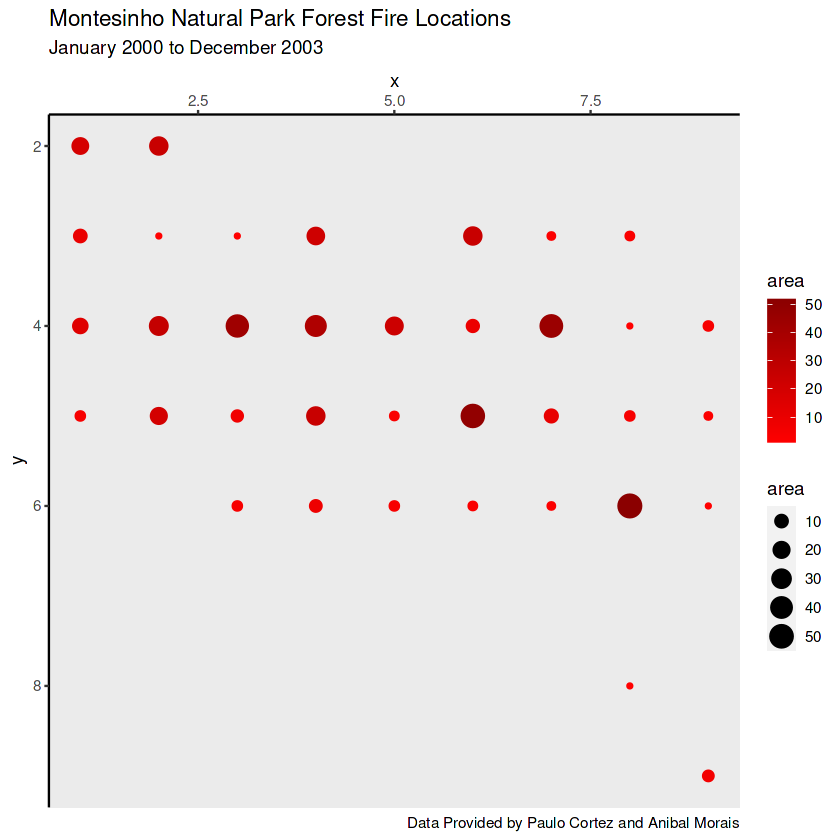

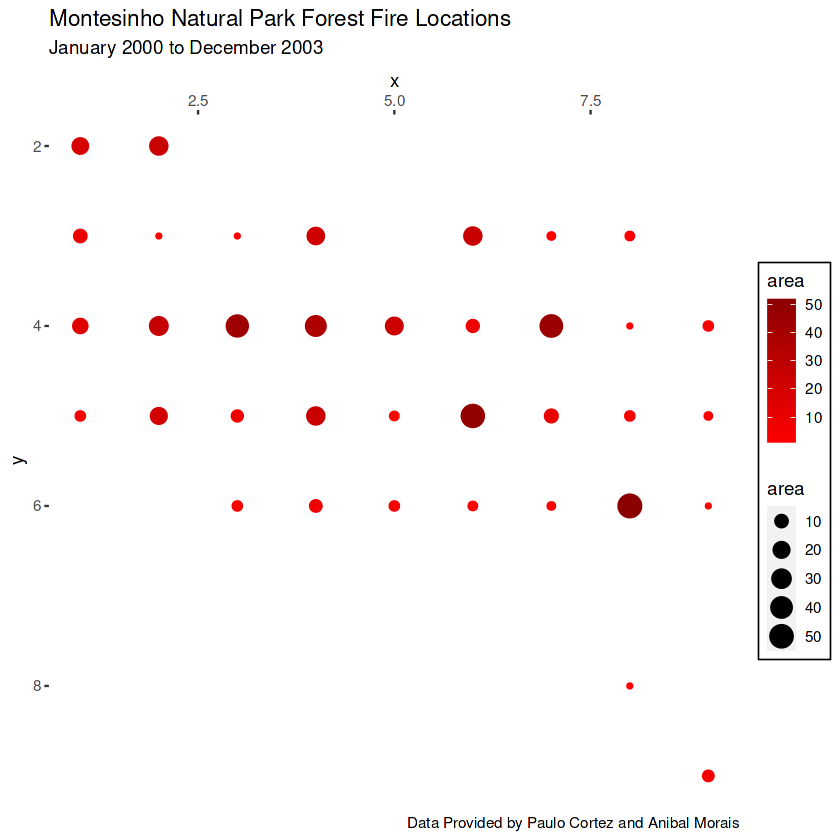

In [32]:
#Plot forest_fire_xy_area
#Create color pallete
fun_color_range <- colorRampPalette(c("red", "darkred"))
my_colors <- fun_color_range(100)

#plot fire locations flip x and y axis to top and include labels
ggp <- ggplot(forest_fire_2_xy_area, aes(x = x, y = y, color = area, size = area)) + geom_point()+ scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 10))+ scale_y_reverse()+scale_x_continuous(position="top") + labs(title = "Montesinho Natural Park Forest Fire Locations",
                                                                                                                          subtitle = "January 2000 to December 2003",
                                                                                                                         caption = "Data Provided by Paulo Cortez and Anibal Morais")
#change color to red scale and remove ggplot grid lines
ggp + scale_colour_gradientn(colors = my_colors) +theme(
  # Hide panel borders and remove grid lines
  panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Change axis line
  axis.line = element_line(colour = "black"))

#remove gridlines in background of plot
ggp + scale_colour_gradientn(colors = my_colors) + theme(
  panel.background = element_rect(fill='transparent'),
  plot.background = element_rect(fill='transparent', color=NA),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  legend.background = element_rect(fill='transparent'),
  legend.box.background = element_rect(fill='transparent')
)

# What is the relationship between fuel index levels and forest fire locations?

DC levels are high all throughout the park.  The DMC hot zones are in the middle of the park along region 4 in the y axis and intersecting regions 1 and 3-6 on the x-axis.  There are other surrounding hot spots in region 3 and 5 on the y axis.  The DC and DMC hot zones correspond with the pattern of the most frequent forest fire locations. 

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



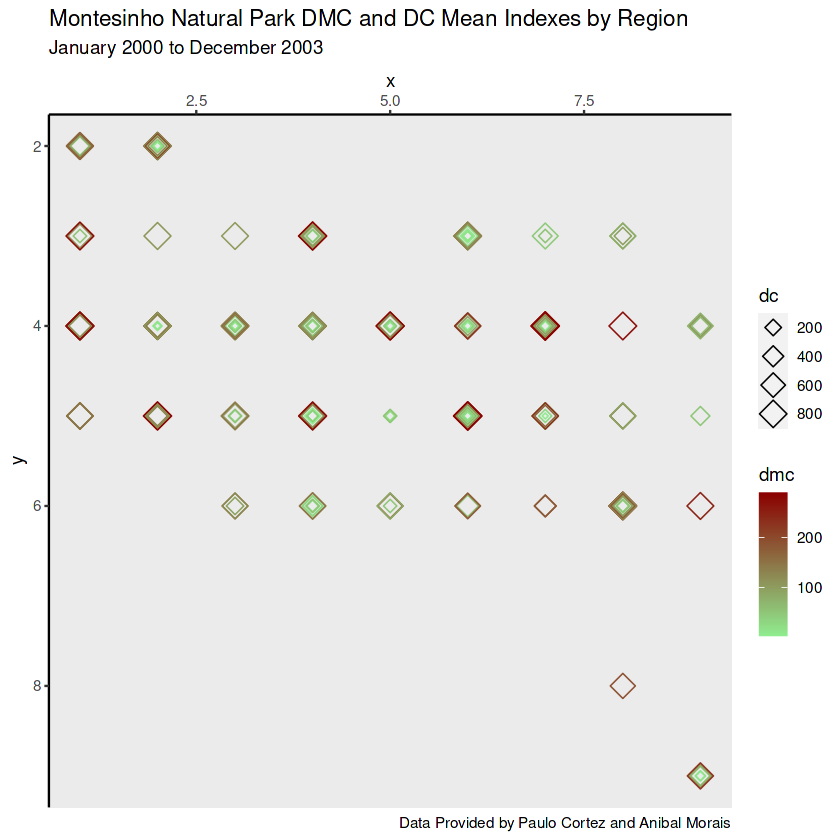

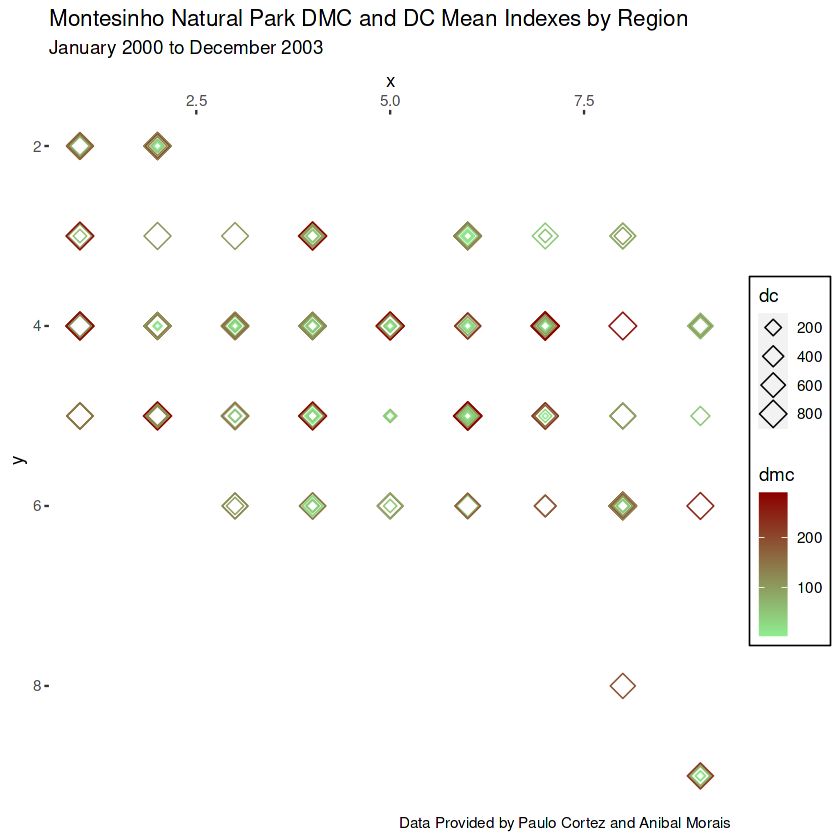

In [33]:
#Create green color pallete
fun_color_range2 <- colorRampPalette(c("lightgreen", "darkred"))
my_colors2 <- fun_color_range2(100)

#plot data
ggp2 <- ggplot(forest_fire_2_xy_dmc_dc, aes(x = x, y = y, color = dmc, size = dc)) + geom_point(shape = 23)+ scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 10))+ scale_y_reverse()+scale_x_continuous(position="top") + labs(title = "Montesinho Natural Park DMC and DC Mean Indexes by Region",
                                                                                                                          subtitle = "January 2000 to December 2003",caption = "Data Provided by Paulo Cortez and Anibal Morais")

ggp2 + scale_colour_gradientn(colors = my_colors2) +theme(
  # Hide panel borders and remove grid lines
  panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Change axis line
  axis.line = element_line(colour = "black"))

#make transparent background
#remove grid lines in background of plot
ggp2 + scale_colour_gradientn(colors = my_colors2) + theme(
  panel.background = element_rect(fill='transparent'),
  plot.background = element_rect(fill='transparent', color=NA),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  legend.background = element_rect(fill='transparent'),
  legend.box.background = element_rect(fill='transparent')
)

# FFMC and ISI in the Park


FFMC and ISI have the same pattern as DC/DMC and the regions with the most forest fires.  Region 4 on the y axis and intersecting regions 1 -7 on the x axis. 

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



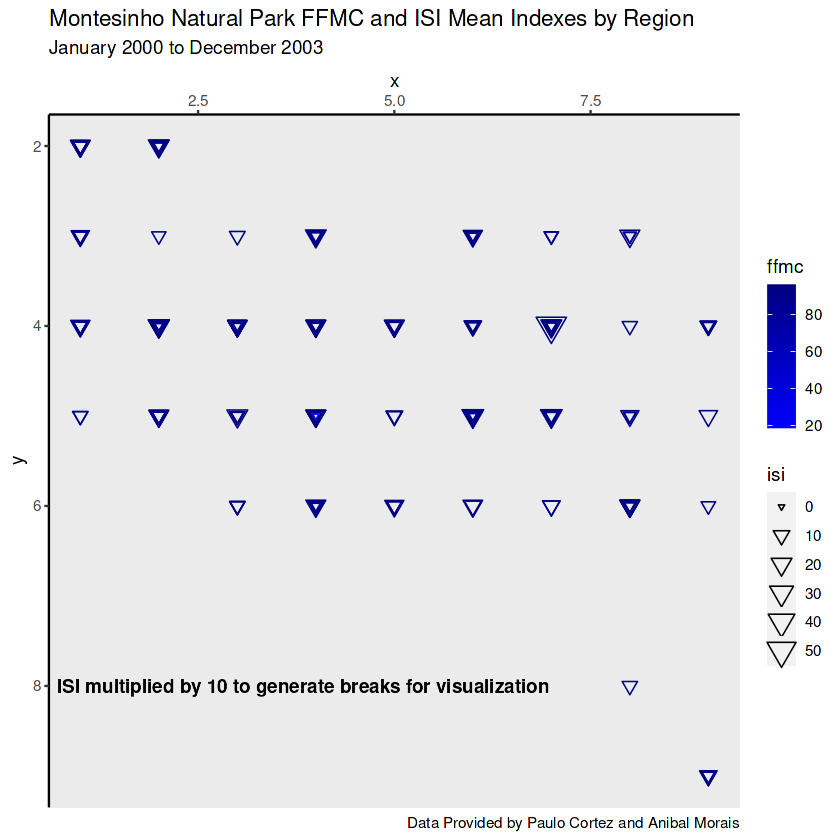

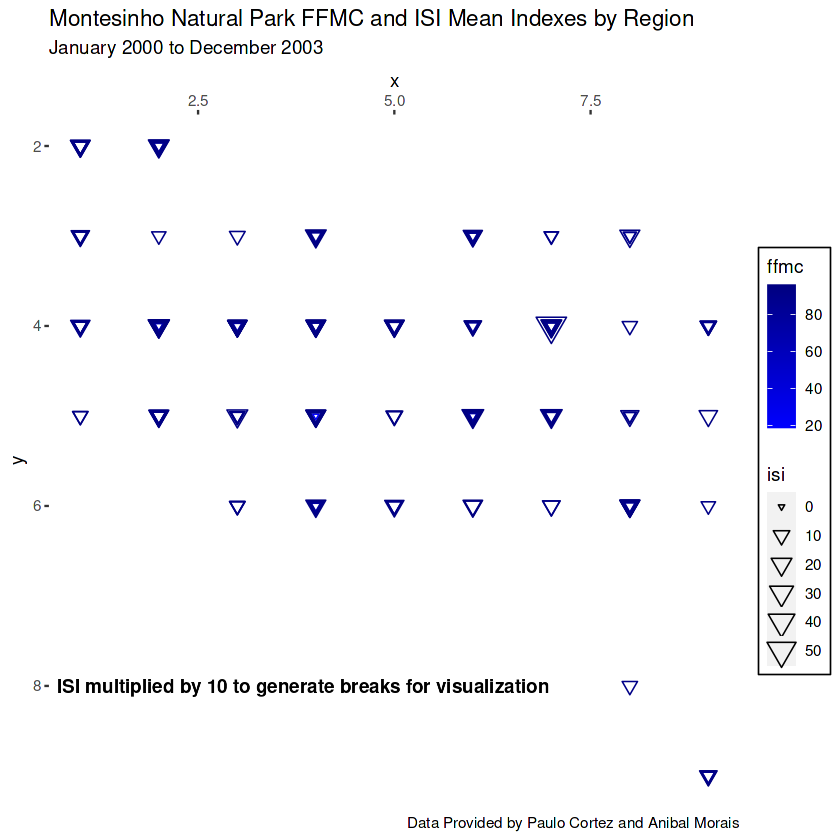

In [34]:
#create blue color palette 
fun_colorrange3 <- colorRampPalette(c("blue", "navy"))
mycolors3 <- fun_colorrange3(20)

#plot data
ggp3 <- ggplot(forest_fire_2ffmc_isi, aes(x = x, y = y, color = ffmc, size = isi)) + geom_point(shape = 25)+ scale_x_continuous(breaks = scales::pretty_breaks(n = 1)) +
  scale_y_continuous(breaks = scales::pretty_breaks(n = 1))+ scale_y_reverse()+scale_x_continuous(position="top") + labs(title = "Montesinho Natural Park FFMC and ISI Mean Indexes by Region",
                                                                                                                          subtitle = "January 2000 to December 2003",caption = "Data Provided by Paulo Cortez and Anibal Morais") + annotate("text", x= 2, y = 8, label = "                                                       ISI multiplied by 10 to generate breaks for visualization", fontface = "bold")
                                                                                                                         




#flip axis and insert size and color schemes
ggp3 + scale_colour_gradientn(colors = mycolors3) +theme(
  # Hide panel borders and remove grid lines
  panel.border = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  # Change axis line
  axis.line = element_line(colour = "black"))

#change background to transparent
ggp3 + scale_colour_gradientn(colors = mycolors3) + theme(
  panel.background = element_rect(fill='transparent'),
  plot.background = element_rect(fill='transparent', color=NA),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  legend.background = element_rect(fill='transparent'),
  legend.box.background = element_rect(fill='transparent')
)


# Build Visualizations for Final Portfolio

# SHARE:SUPPORTING VISUALIZATIONS AND KEY FINDINGS

## WAS THERE A DROUGHT FROM 2000 - 2003?

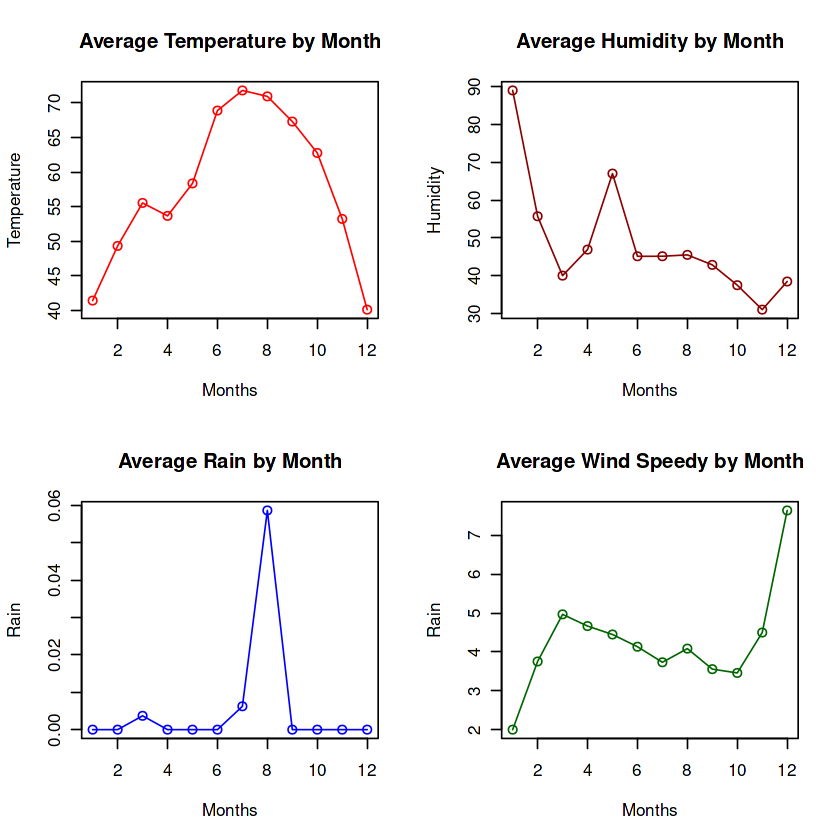

In [35]:
par(mfrow = c(2,2))
m5 <- tapply(forest_fire_2$temp, list(forest_fire_2$month), mean)
plot(m5, main = "Average Temperature by Month", type = "o", xlab = "Months", ylab = "Temperature", col = "red")

m6 <- tapply(forest_fire_2$humidity, list(forest_fire_2$month), mean)
plot(m6, main = "Average Humidity by Month", type = "o", xlab = "Months", ylab = "Humidity", col = "darkred")

m7 <- tapply(forest_fire_2$rain, list(forest_fire_2$month), mean)
plot(m7, main = "Average Rain by Month", type = "o", xlab = "Months", ylab = "Rain", col = "blue")

m8 <- tapply(forest_fire_2$wind, list(forest_fire_2$month), mean)
plot(m8, main = "Average Wind Speedy by Month", type = "o", xlab = "Months", ylab = "Rain", col = "darkgreen")

# ARE VISITORS THE CAUSE OF FOREST FIRES?

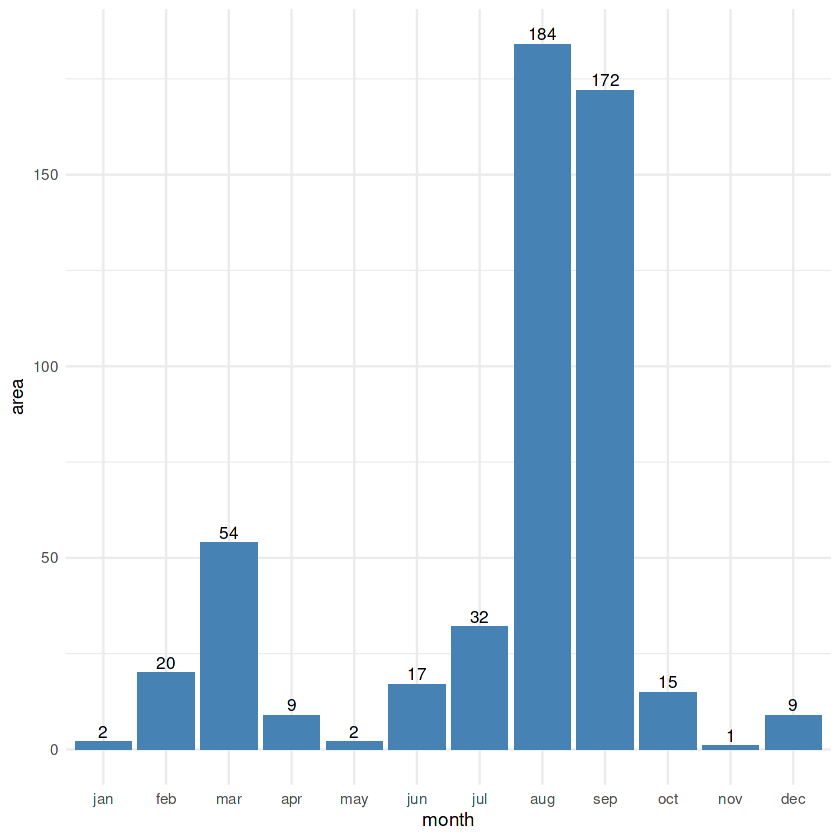

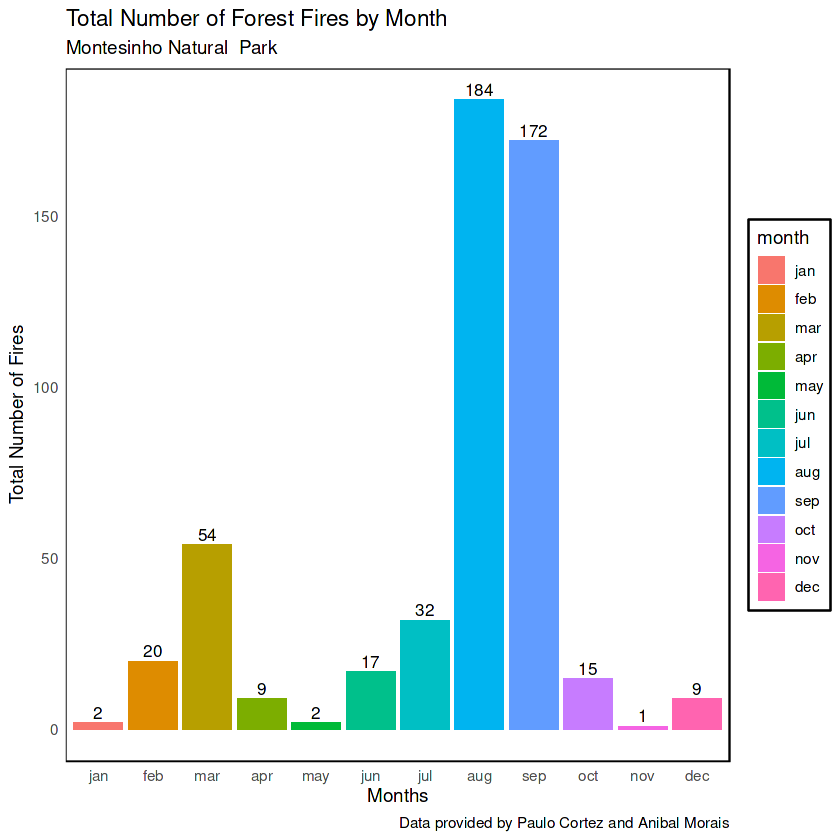

In [36]:
#Plotting number of forest fires by month
fm <- ggplot(forest_fire_2_area_count, aes(x = month, y = area))
fm + geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = area), vjust = -0.3, size = 3.5) +
  theme_minimal()


fm + geom_bar(aes(fill = month), stat = "identity") +
  geom_text(aes(label = area), vjust = -0.3, size = 3.5) +
  theme_minimal() +
  labs(y = "Total Number of Fires", x = "Months", title = "Total Number of Forest Fires by Month", subtitle = "Montesinho Natural  Park", caption = "Data provided by Paulo Cortez and Anibal Morais") +
  theme(
    panel.background = element_rect(fill='transparent'),
    plot.background = element_rect(fill='transparent', color=NA),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    legend.background = element_rect(fill='transparent'),
    legend.box.background = element_rect(fill='transparent')
  )

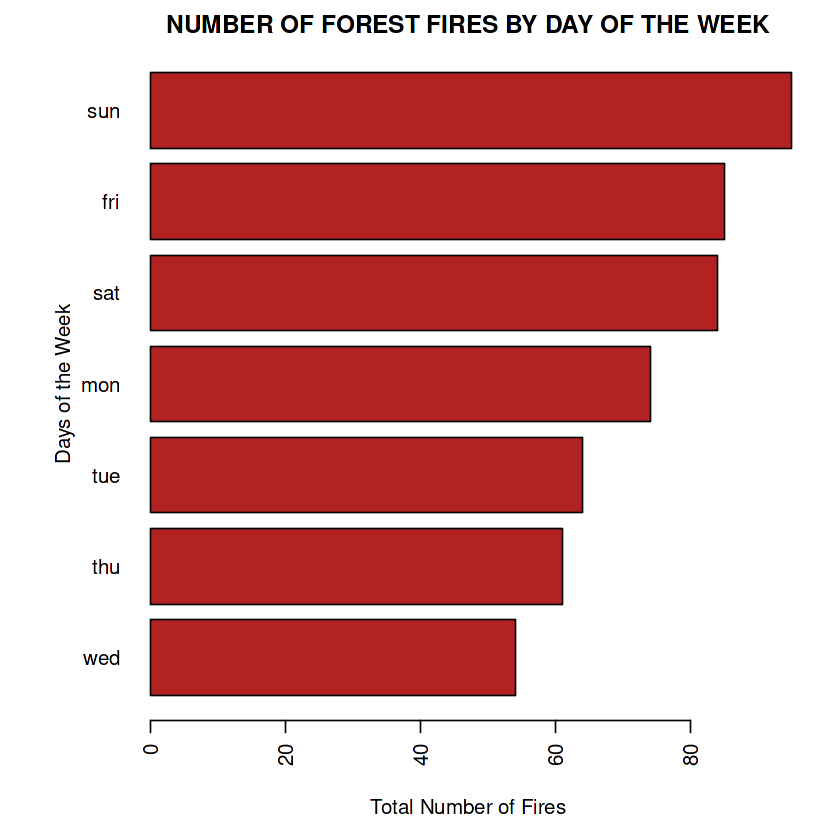

In [37]:
fire_desc_2 <- forest_fire_2_area_day[order(forest_fire_2_area_day$area, decreasing=FALSE),]
par(mar=c(5, 6, 2, 2))
barplot(fire_desc_2$area, names.arg=fire_desc_2$day, las = 2,
        horiz = TRUE, cex.names=1, cex.axis=1, col = "#b22222", xlab = "Total Number of Fires",
        ylab = "Days of the Week", main = "NUMBER OF FOREST FIRES BY DAY OF THE WEEK") 

# HOW COMBUSTIBLE IS THE SOIL BY AUGUST AND SEPTEMBER?

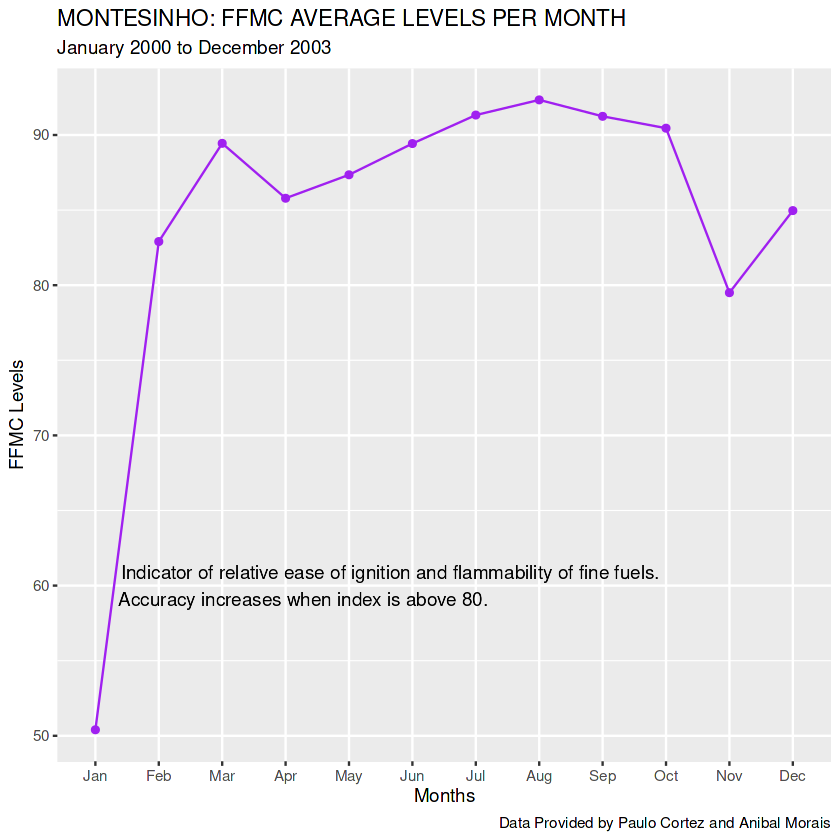

In [38]:
ffmc_gplot <- ggplot(ffmc_2_means, aes(x = ffmc_2_months, y = ffmc_2_values, group = 1)) +
  geom_line(color = "purple") +
  geom_point(color = "purple") + labs(y = "FFMC Levels", x = "Months", title = "MONTESINHO: FFMC AVERAGE LEVELS PER MONTH",
                                   subtitle = "January 2000 to December 2003",
                                   caption = "Data Provided by Paulo Cortez and Anibal Morais")

ffmc_gplot + annotate("text", x= 2, y = 60, label = "                                                                                        Indicator of relative ease of ignition and flammability of fine fuels.
                                                       Accuracy increases when index is above 80.")

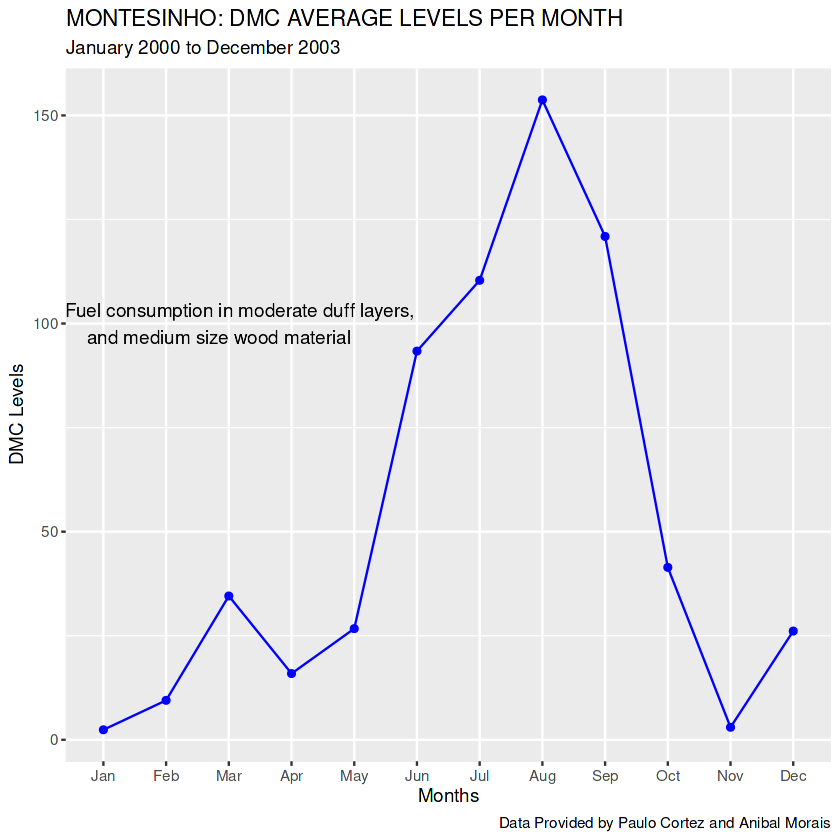

In [39]:
dmc_gplot <- ggplot(dmc_2_means, aes(x = dmc_2_months, y = dmc_2_values, group = 1)) +
  geom_line(color = "blue") +
  geom_point(color = "blue") + labs(y = "DMC Levels", x = "Months", title = "MONTESINHO: DMC AVERAGE LEVELS PER MONTH",
                                    subtitle = "January 2000 to December 2003",
                                    caption = "Data Provided by Paulo Cortez and Anibal Morais")

dmc_gplot + annotate("text", x= 2, y = 100, label = "                            Fuel consumption in moderate duff layers,
                    and medium size wood material")

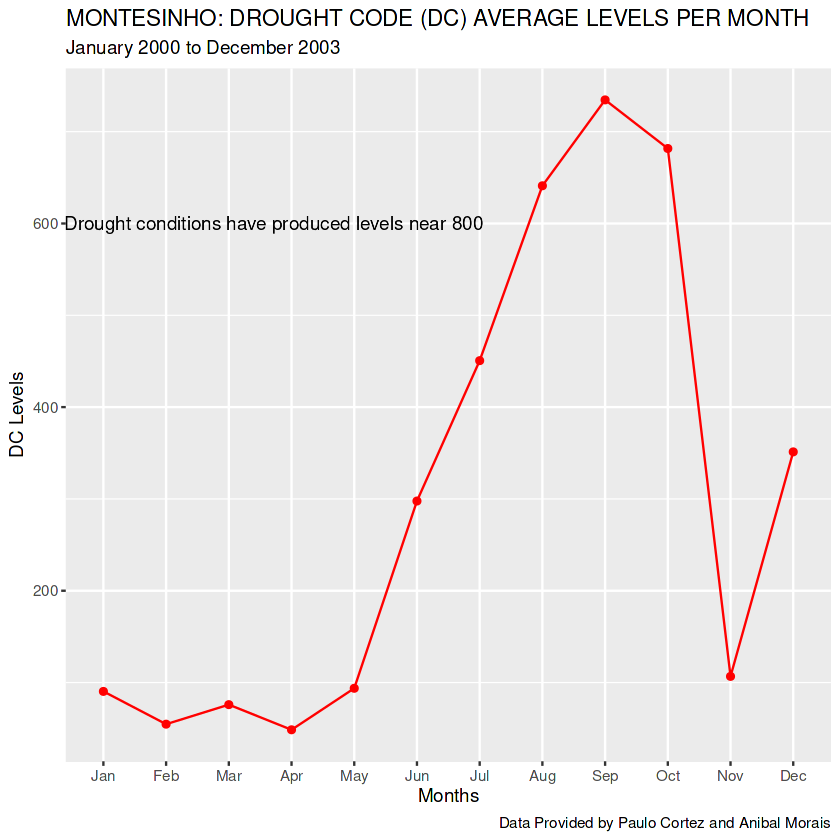

In [40]:
dc_gplot <- ggplot(dc_2_means, aes(x = dc_2_months, y = dc_2_values, group = 1)) +
  geom_line(color = "red") +
  geom_point(color = "red") + labs(y = "DC Levels", x = "Months", title = "MONTESINHO: DROUGHT CODE (DC) AVERAGE LEVELS PER MONTH",
                                    subtitle = "January 2000 to December 2003",
                                    caption = "Data Provided by Paulo Cortez and Anibal Morais")

dc_gplot + annotate("text", x= 2, y = 600, label = "                                         Drought conditions have produced levels near 800")

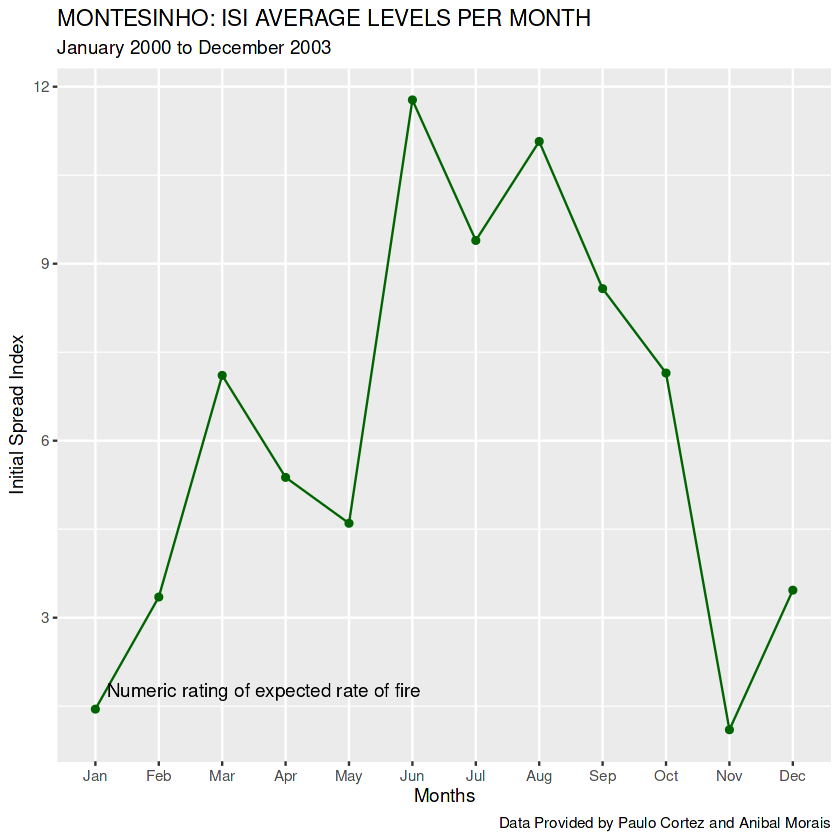

In [41]:
isi_gplot <- ggplot(isi_2_means, aes(x = isi_2_months, y = isi_2_values, group = 1)) +
  geom_line(color = "darkgreen") +
  geom_point(color = "darkgreen") + labs(y = "Initial Spread Index", x = "Months", title = "MONTESINHO: ISI AVERAGE LEVELS PER MONTH",
                                      subtitle = "January 2000 to December 2003",
                                      caption = "Data Provided by Paulo Cortez and Anibal Morais")

isi_gplot + annotate("text", x= 2, y = 2, label = "                                       
                                        Numeric rating of expected rate of fire")



# FINAL PORTFOLIO
# ACT:CONCLUSIONS

## What role does weather/climate play in causing fires in public lands?
### Image edited on Adobe Illustrator. 

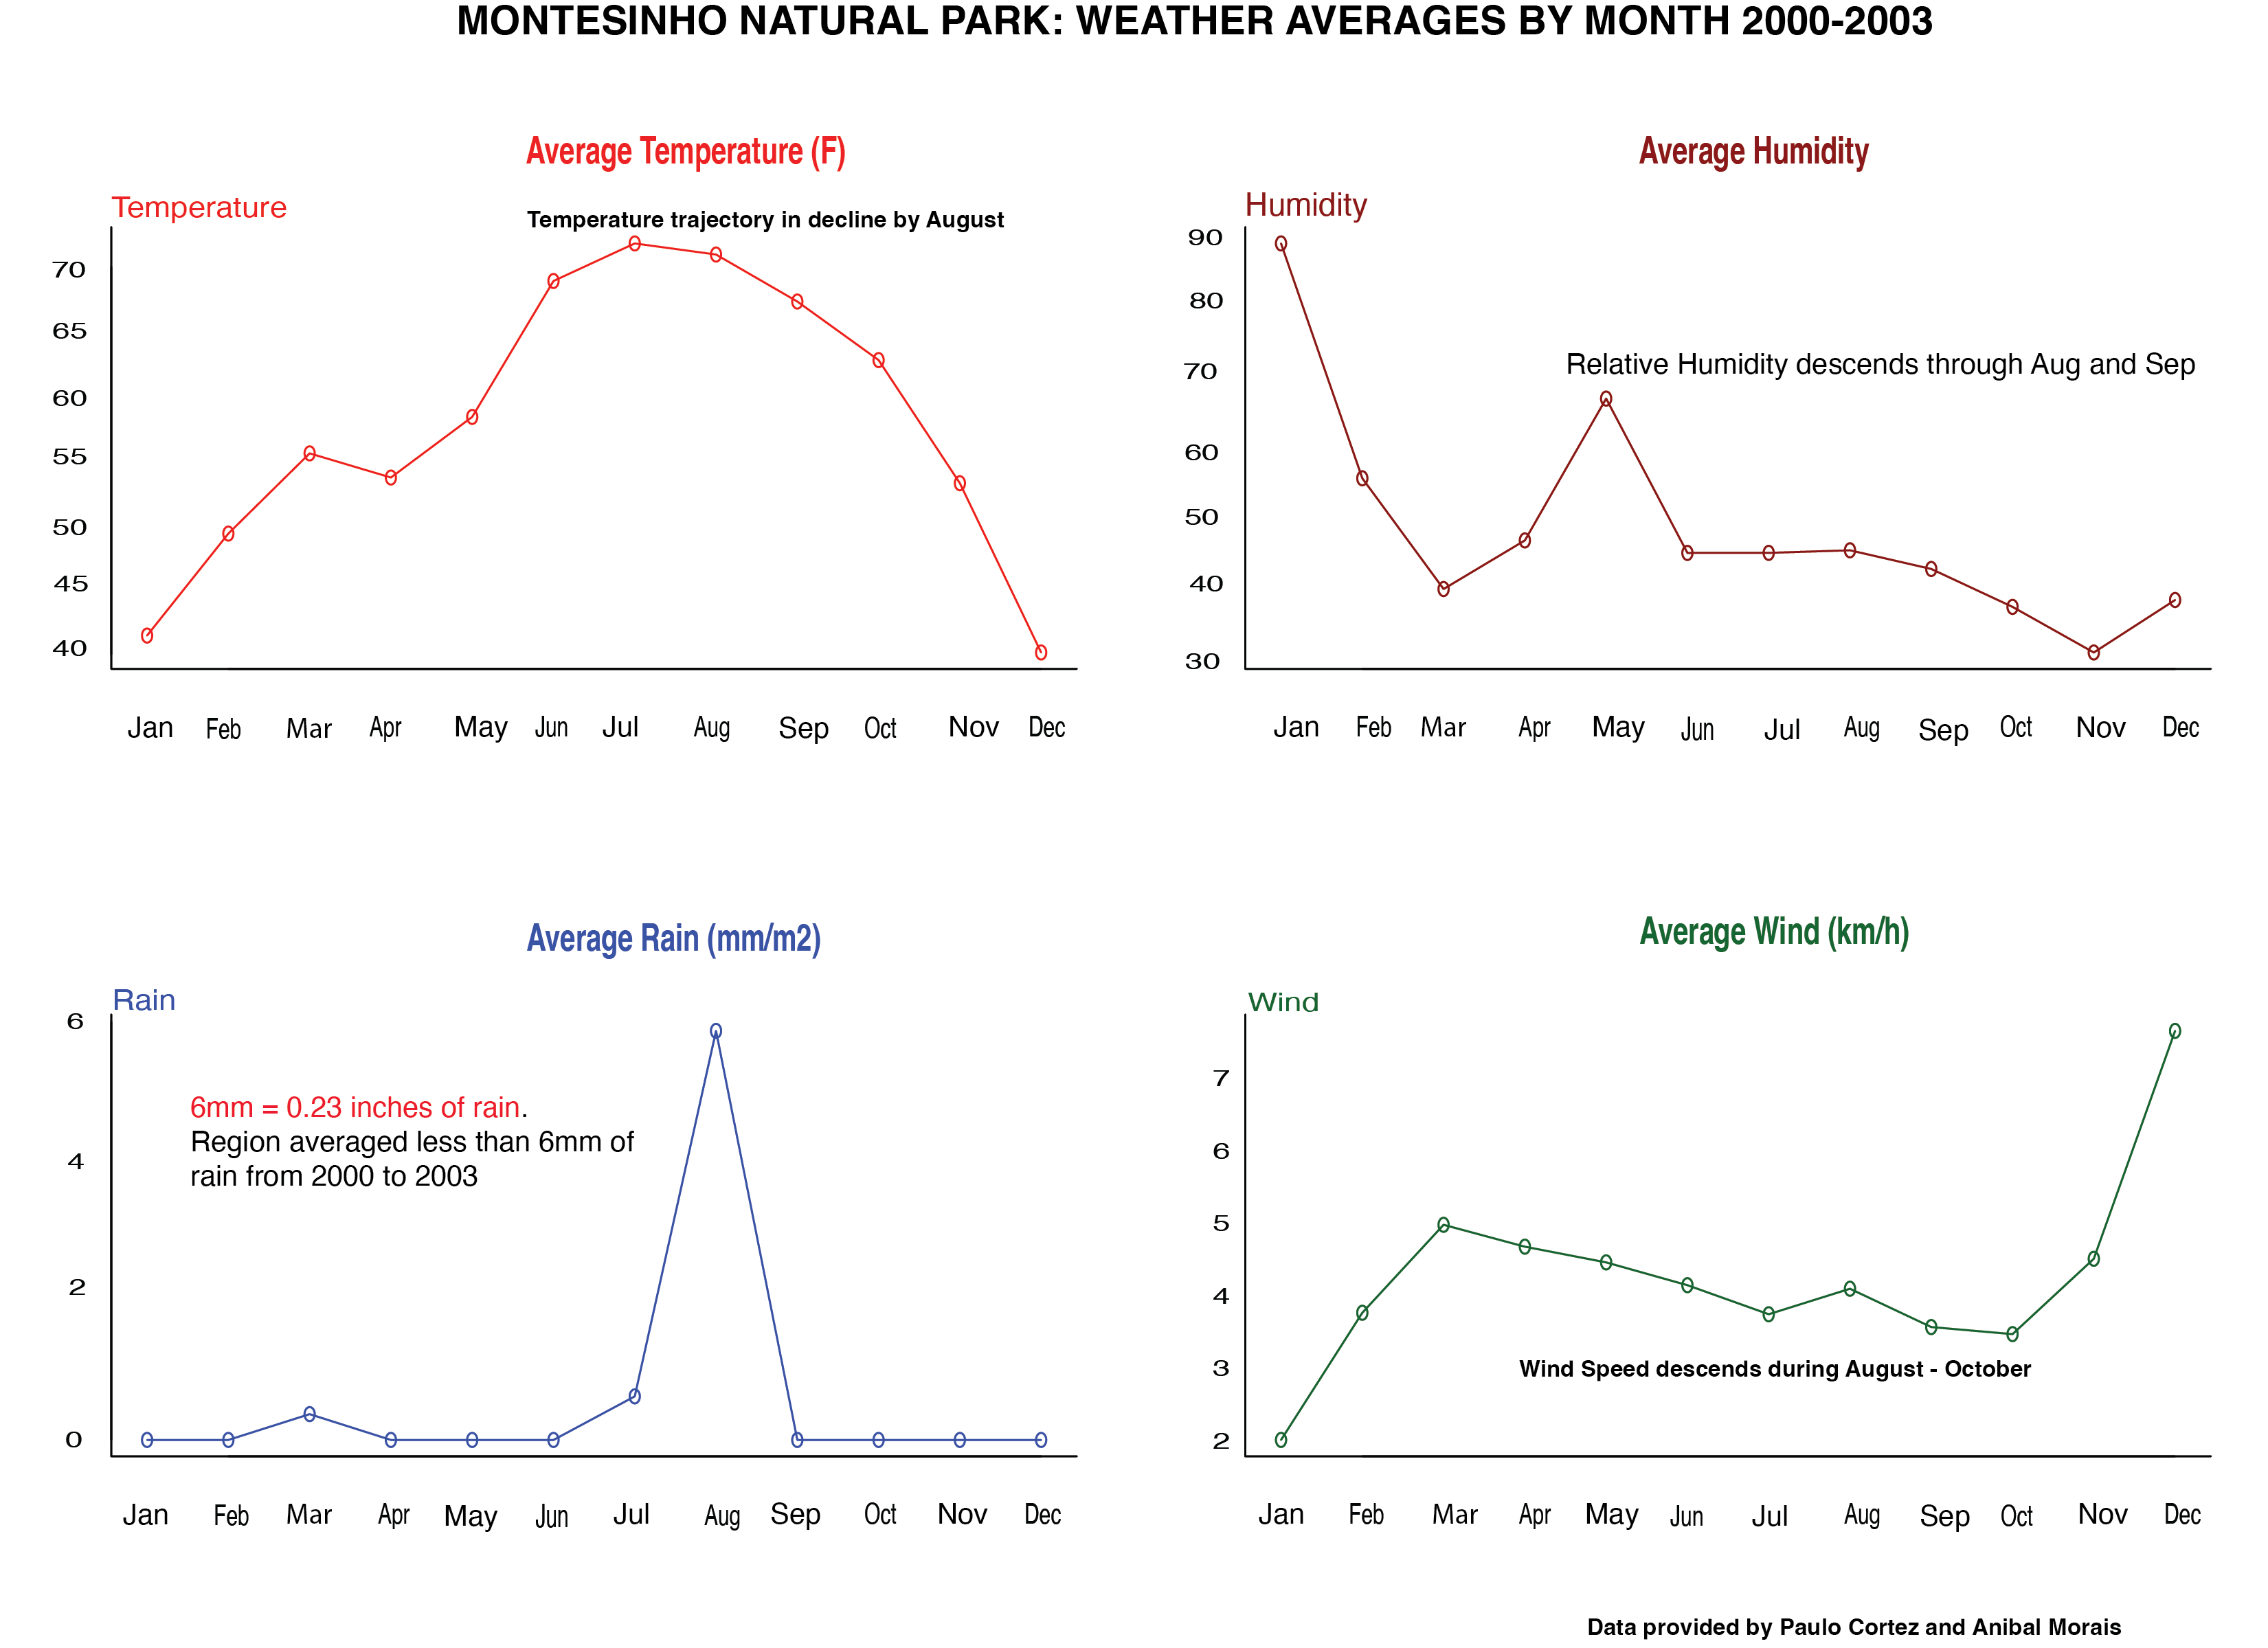

The lack of rain from 2000-2003 created a drought in Montesinho Natural Park.  January averaged relative humidity of 90%. The humidity and the lack of rain dried up soil layers throughout the park.

## What time of year do most fires take place and what is the significance of the time frame?
### Final Images Edited on Adobe Illustrator

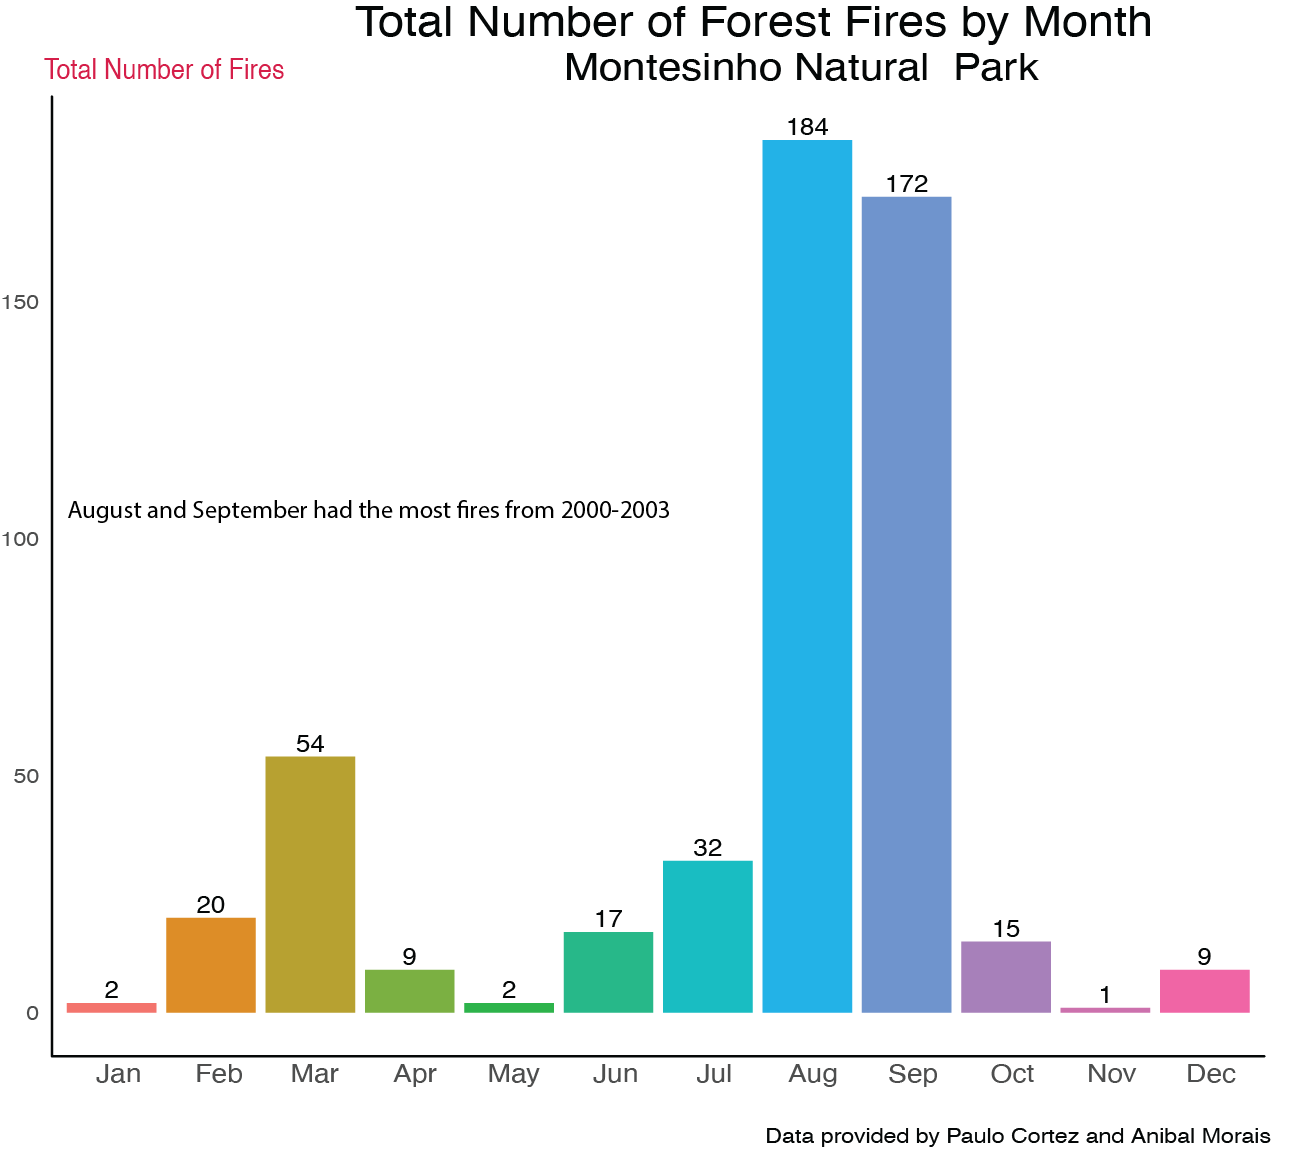

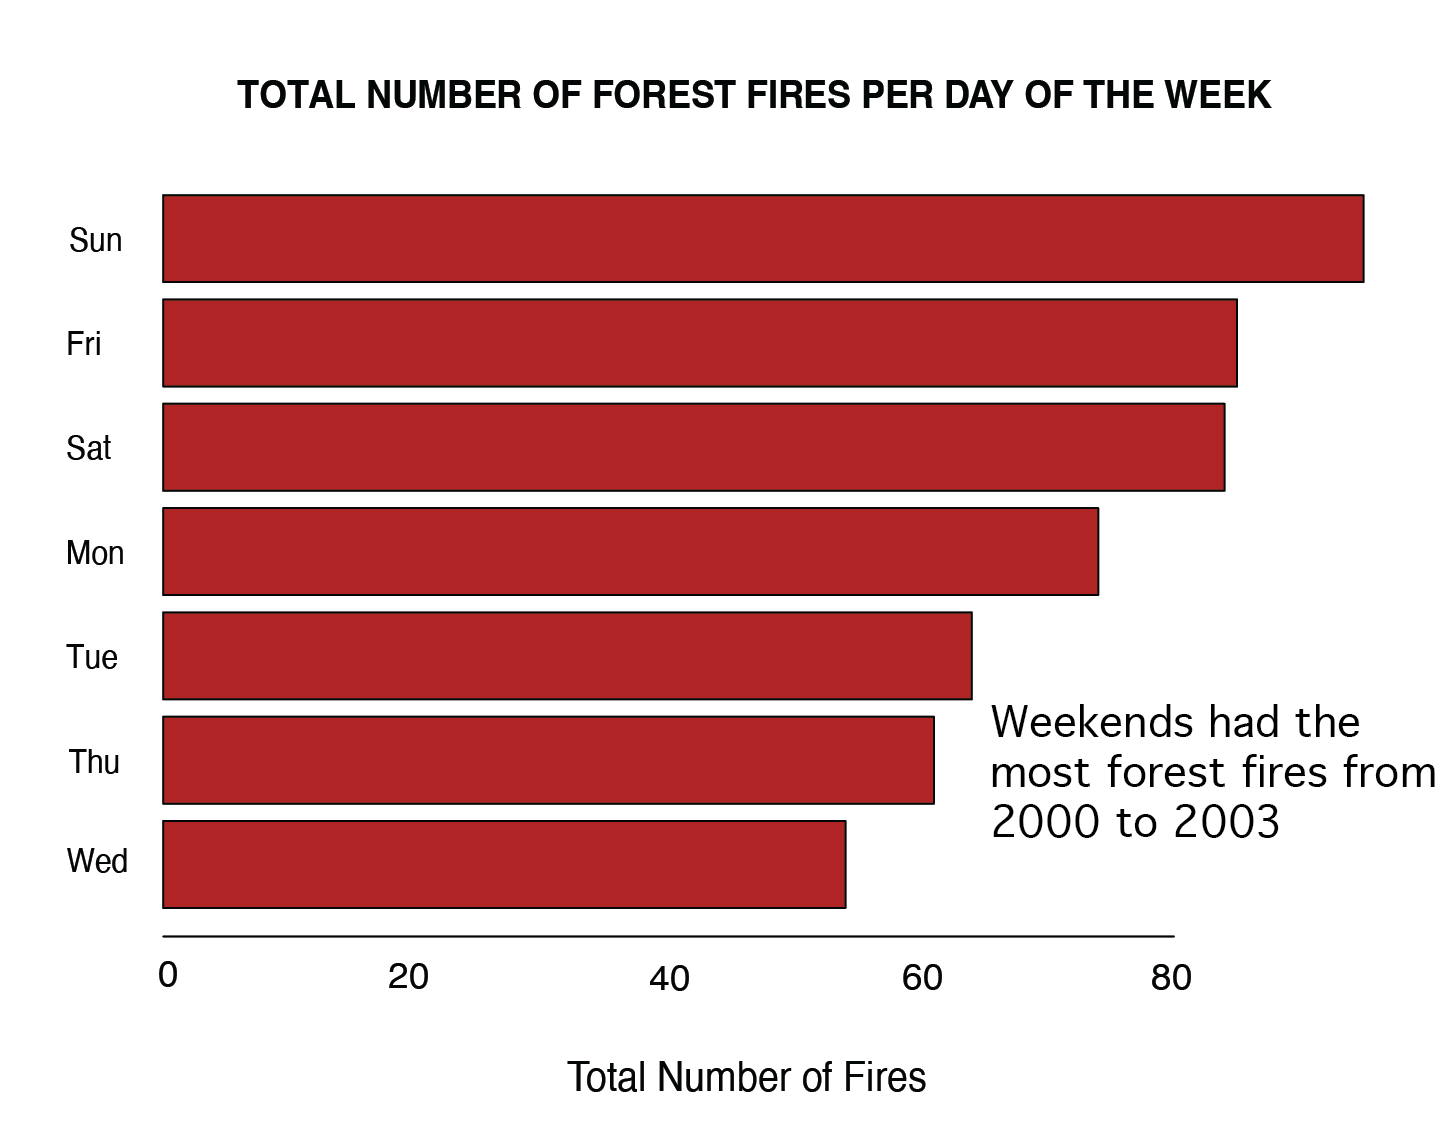

The frequency of forest fires drastically increases in August and September.  From 2000-20003, Friday, Saturday and Sunday were the days with most forest fires.  Summers in Portugal last from June to September.  August is the official summer month of Portugal.  There is a correlation between visitor attendance and forest fire frequency.  Data pertaining to visitor attendance is needed to clearly link visitor attendance as a prominent cause of forest fires.  

## What are the soil conditions that cause fires in public lands?

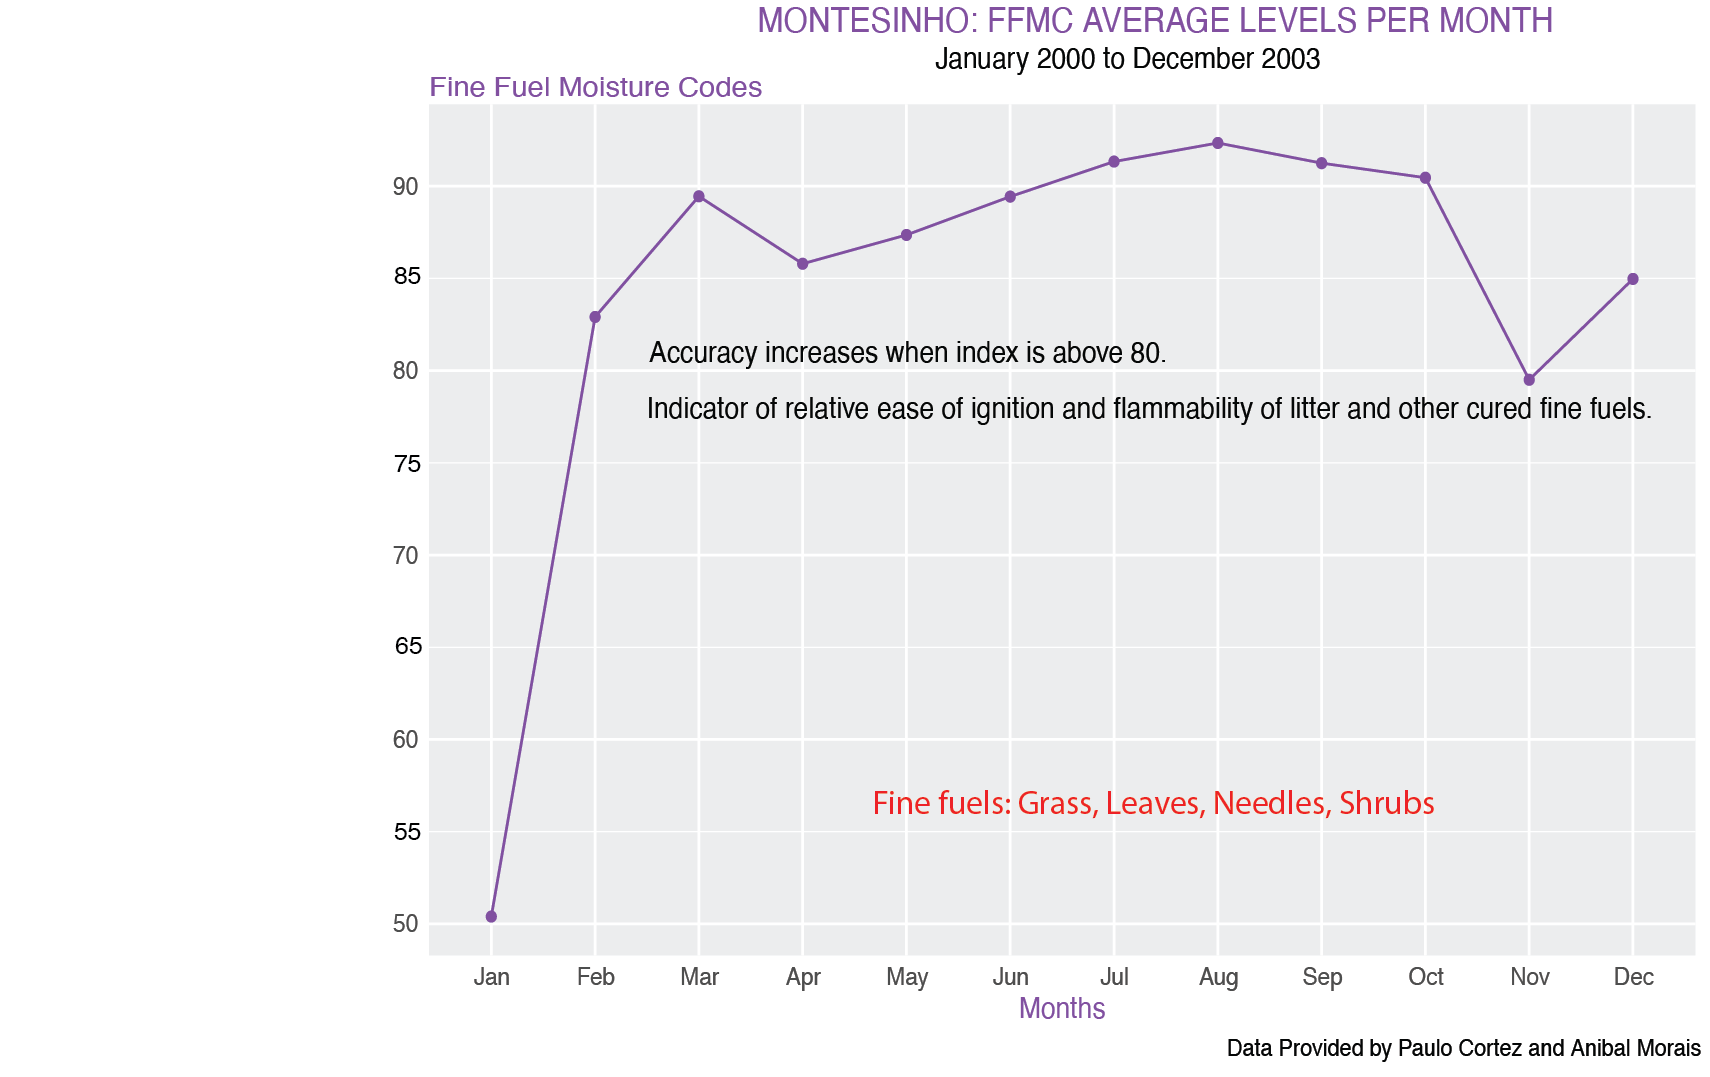

Humidity and lack of rain are reasons for the high index levels.  FFMC is affected by humidity, temperature, rain, and wind.  The extreme humidity in January and the lack of rain are the causes for the high indicator of relative ease of ignition of fine fuels of loosely compacted layers at moderate depth and deep compact layers.  

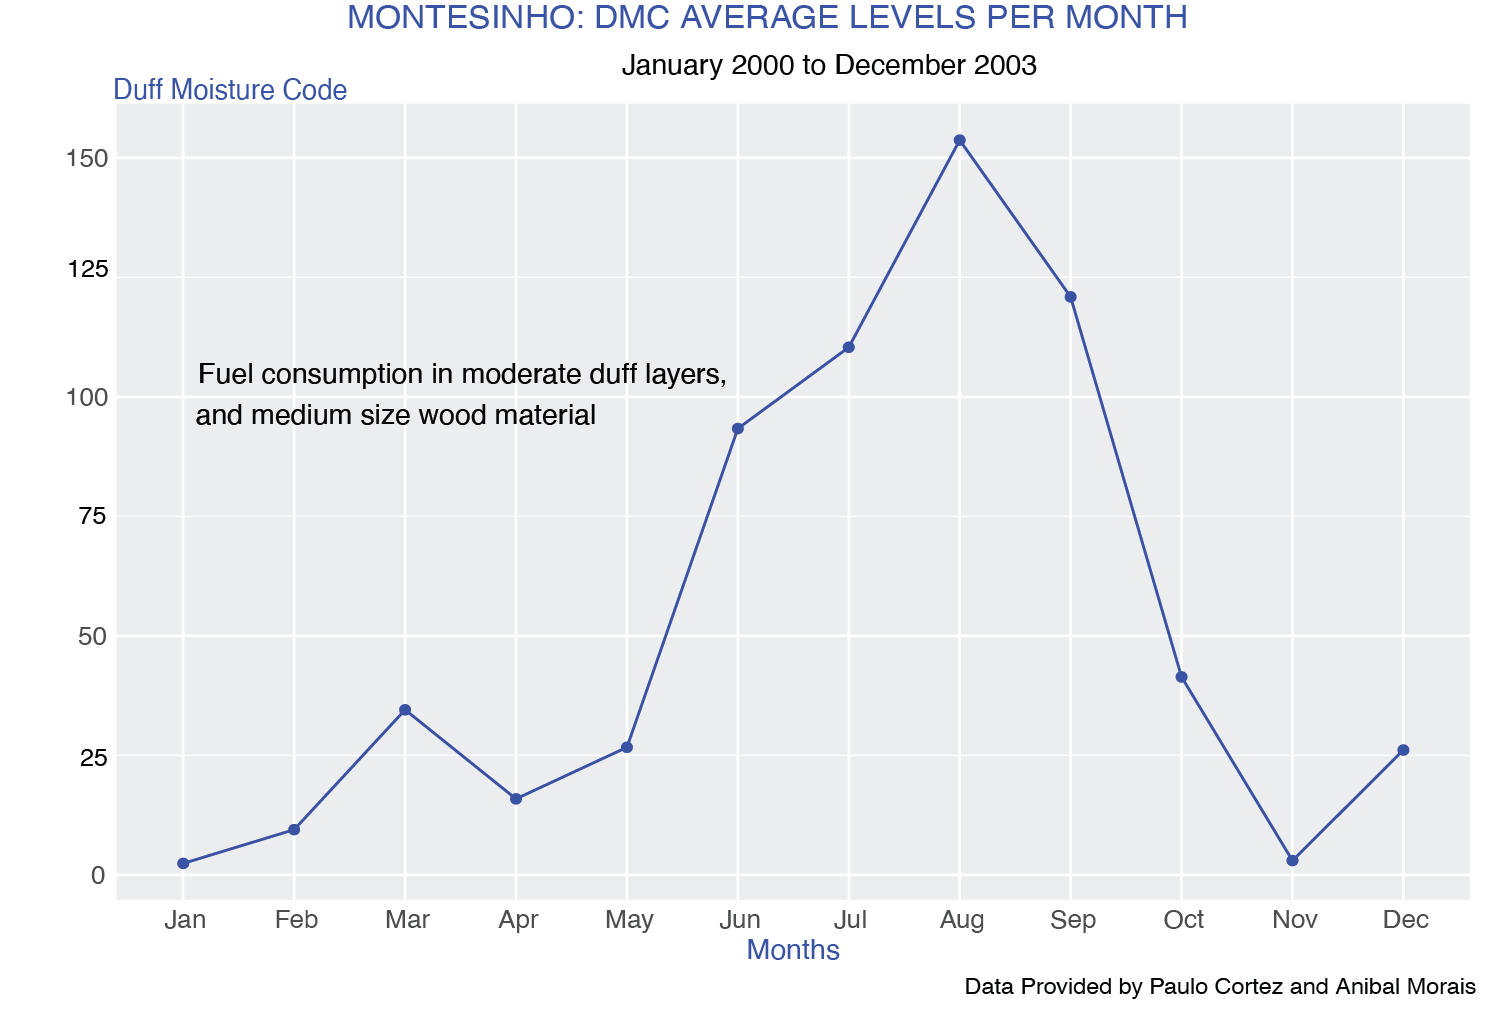

Duff Moisture Code reaches it's apex in August.  DMC impacts medium size wood material.

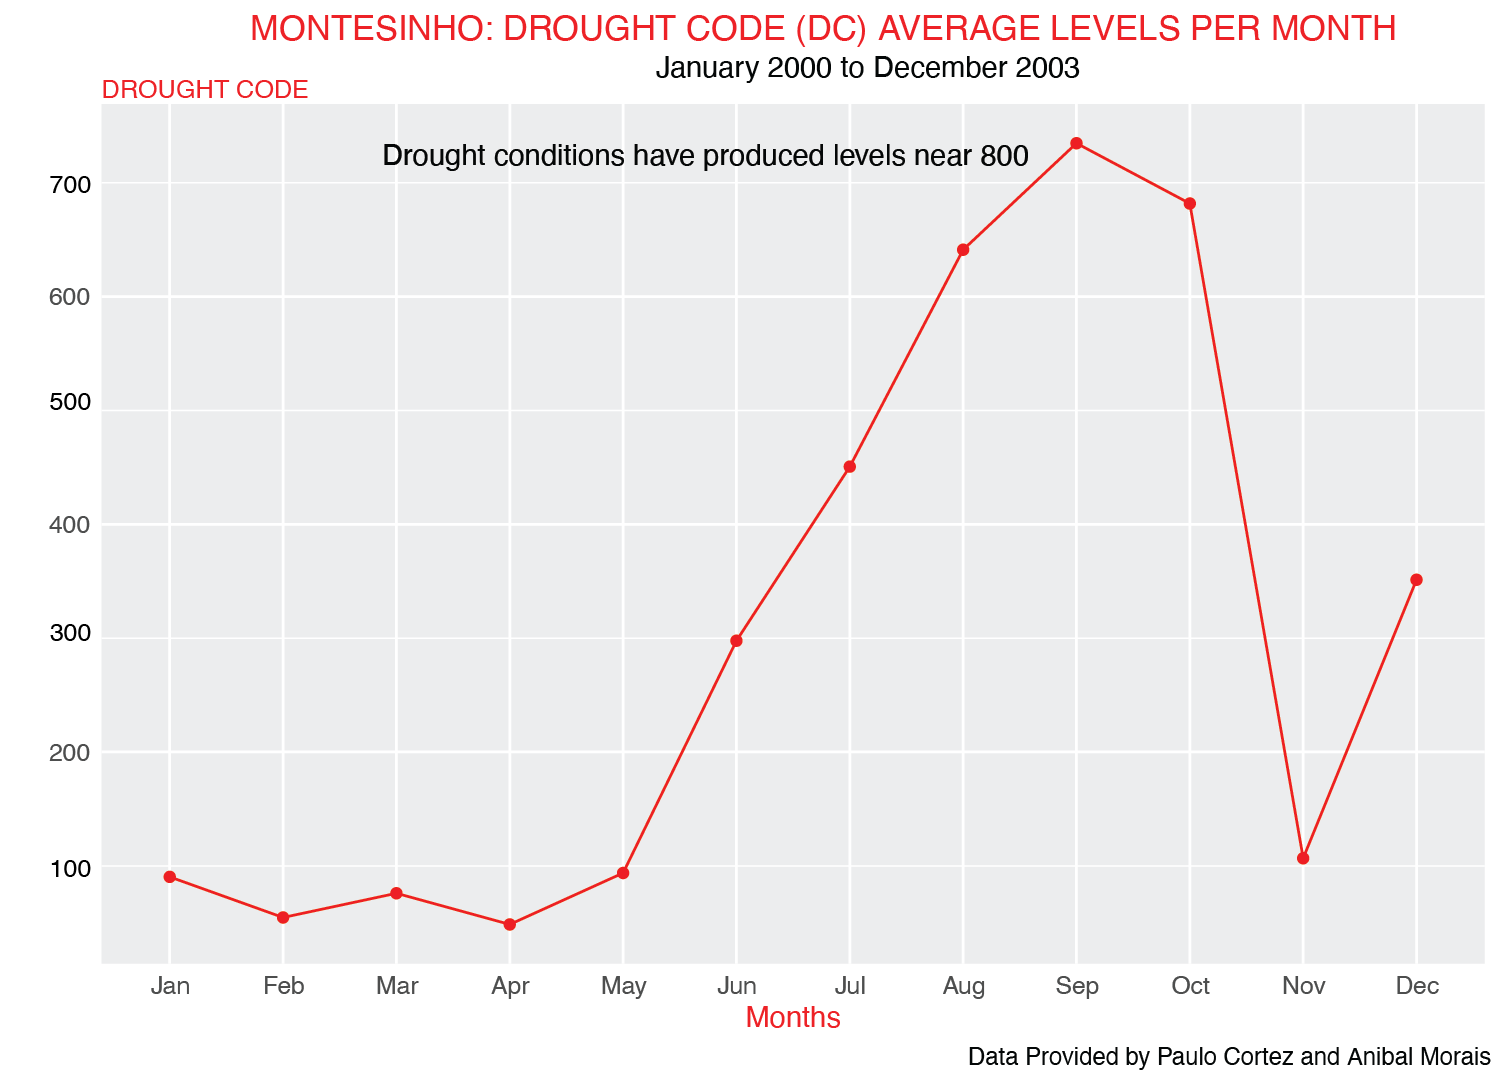

Drought Conditions are at their highest from August to October.  The conditions have been rapidly climbing since May.

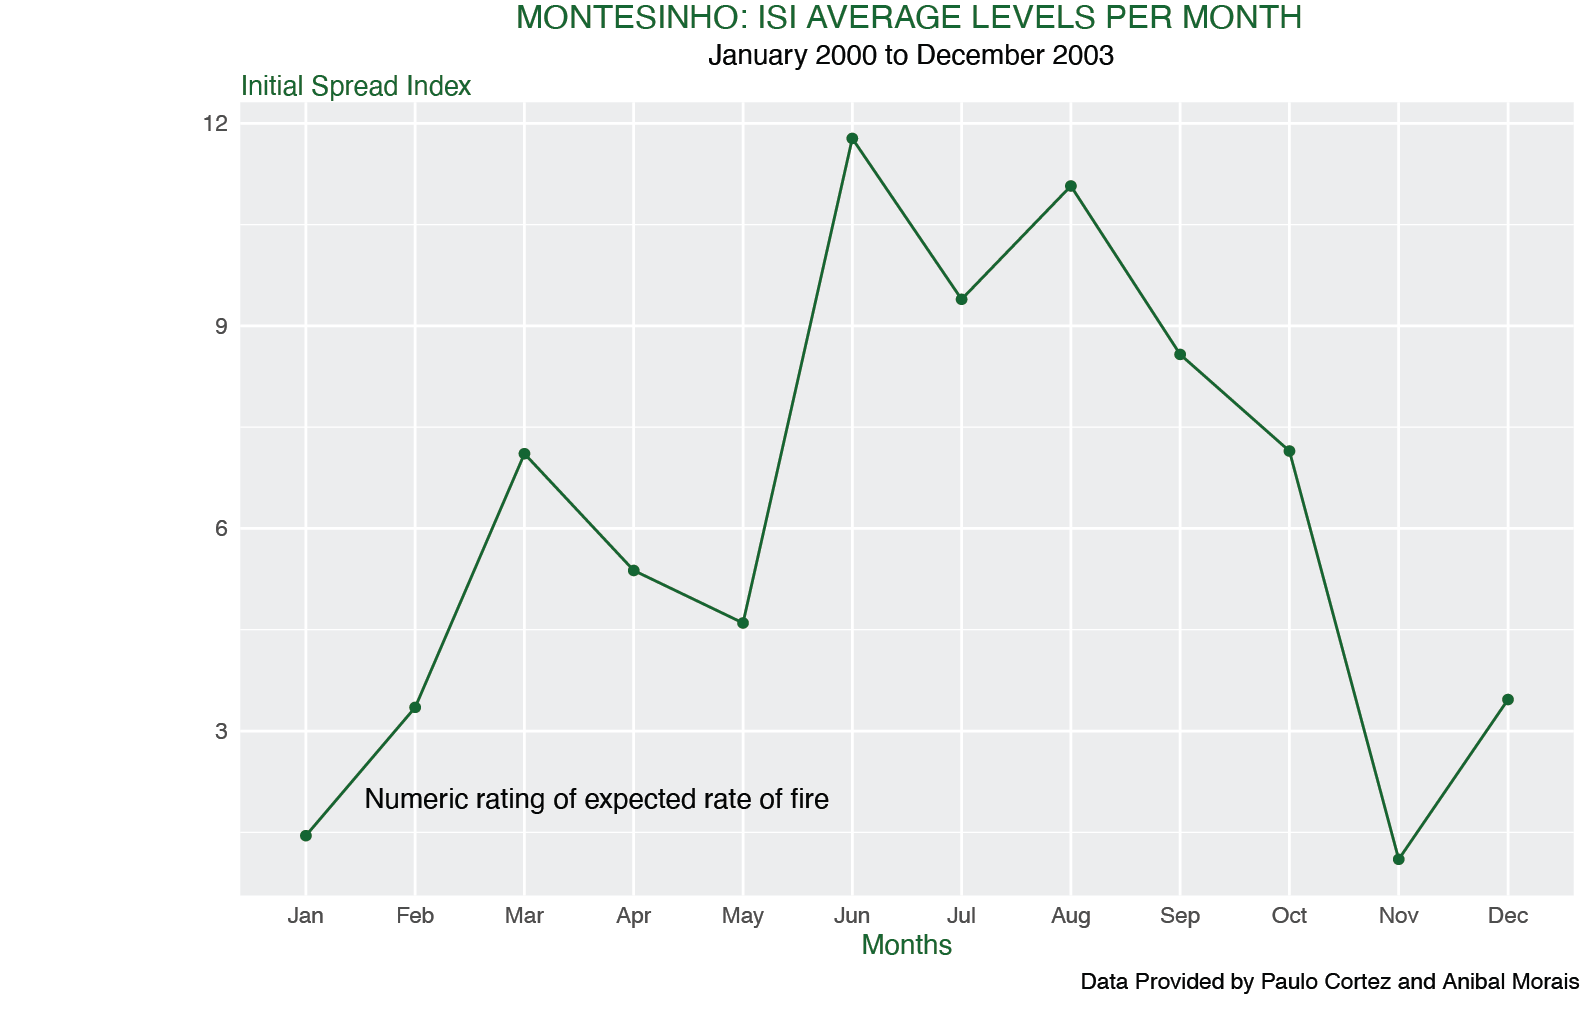


ISI is impacted by FFMC and Wind. Layers at mid and deep levels are filled with fine fuel ready to spark. ISI is at it's second highest point in August and descends into September. 

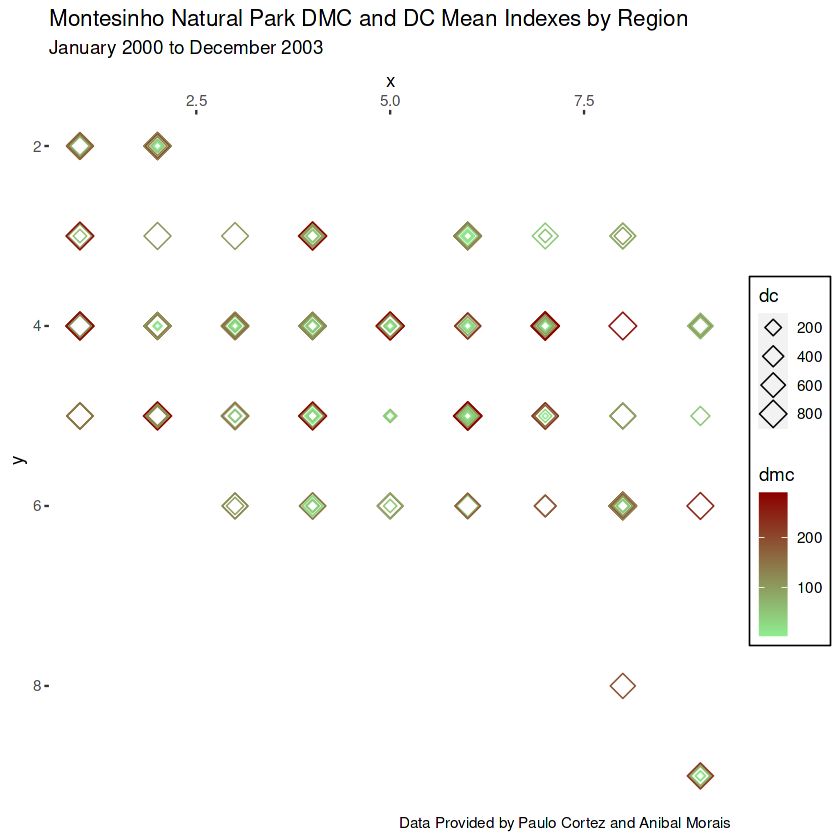

In [42]:
ggp2 + scale_colour_gradientn(colors = my_colors2) + theme(
  panel.background = element_rect(fill='transparent'),
  plot.background = element_rect(fill='transparent', color=NA),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  legend.background = element_rect(fill='transparent'),
  legend.box.background = element_rect(fill='transparent')
)


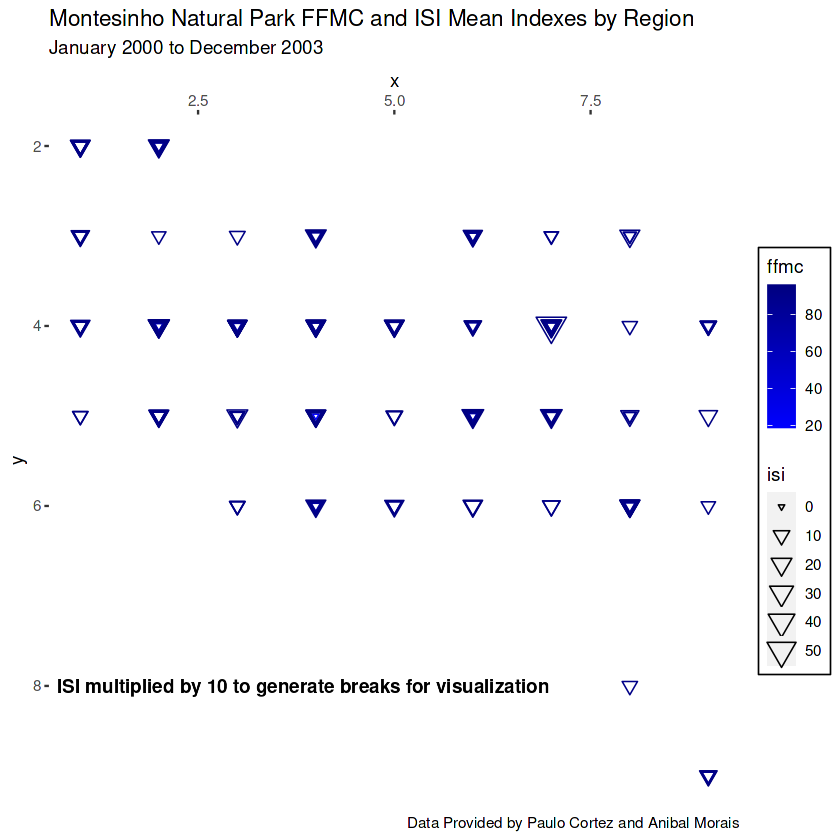

In [43]:
ggp3 + scale_colour_gradientn(colors = mycolors3) + theme(
  panel.background = element_rect(fill='transparent'),
  plot.background = element_rect(fill='transparent', color=NA),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  legend.background = element_rect(fill='transparent'),
  legend.box.background = element_rect(fill='transparent')
)

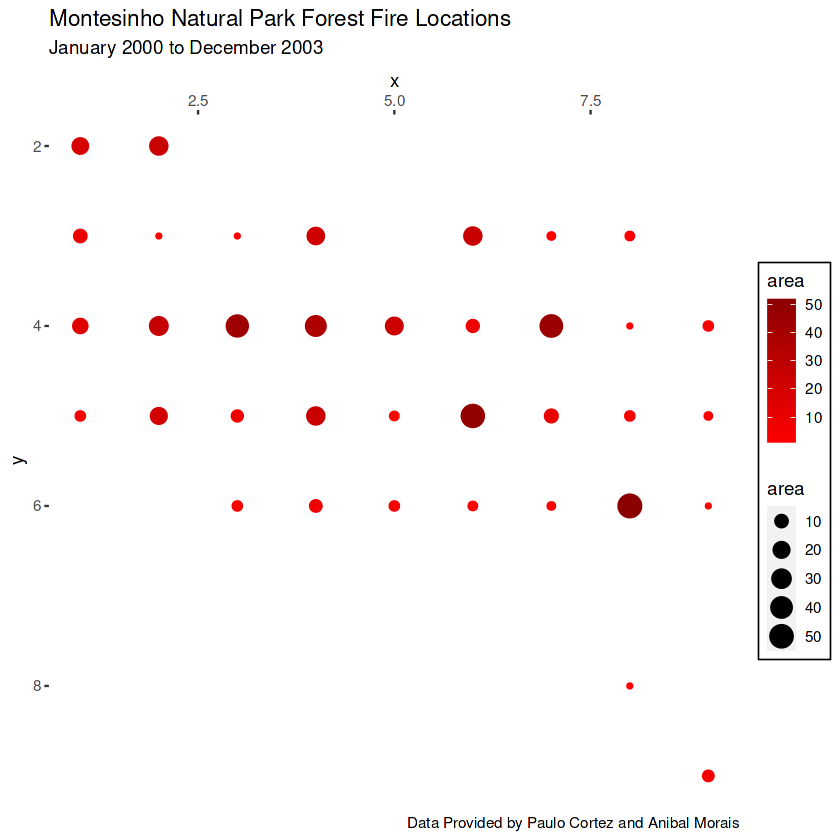

In [44]:
ggp + scale_colour_gradientn(colors = my_colors) + theme(
  panel.background = element_rect(fill='transparent'),
  plot.background = element_rect(fill='transparent', color=NA),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  legend.background = element_rect(fill='transparent'),
  legend.box.background = element_rect(fill='transparent')
)

The region of the park that burned most frequently is sector 4 on the y axis and intersects with sectors 1-7 on the x axis.  The same region has the highest FFMC, DMC, DC and ISI index levels.  Loose layers, tightly compacted, moderate wood, and deep decomposing organic layers are extremely dry by August and September.  


## RECOMMENDATIONS TO PREVENT FIRES IN PUBLIC LANDS AND LAKES
Recommendations are dependent on weather and FWI fuel moisture codes.  If weather conditions and fuel moisture codes follow the pattern of the study we recommend the following throughout the year and especially in August and September:

  *Limit visitor accessibility to regions with high FFMC, DMC, DC and ISI index levels. 
  
  *Increase frequency of patrol of high fuel moisture code regions by park rangers and natural park employees.
  
  *If possible, provide regions with water to decrease fuel moisture indexes. 
  

## Extrapolation of study to regions with similar climate conditions to the study
Each region has varying conditions even if the climate conditions are similar.  Additional data may be necessary to convince legislators and bureaucrats to take the steps recommended.  Similar climate conditions and fuel moisture codes require an increased interest in the region. 

## Can the findings be used as indicators of long term climate change effects in Santa Barbara county?
More data is required. 

# ADDITIONAL DELIVERABLES NEEDED?
To make a definite conclusion on the role visitors play in causing forest fires, data on park attendance is needed.  